In [1]:
!pwd

/root/programowanie/zmum


In [1]:
import pandas as pd

df = pd.read_csv('./Crop_recommendation.csv')

df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df.describe().to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & N & P & K & temperature & humidity & ph & rainfall \\\\\n\\midrule\ncount & 2200.000000 & 2200.000000 & 2200.000000 & 2200.000000 & 2200.000000 & 2200.000000 & 2200.000000 \\\\\nmean & 50.551818 & 53.362727 & 48.149091 & 25.616244 & 71.481779 & 6.469480 & 103.463655 \\\\\nstd & 36.917334 & 32.985883 & 50.647931 & 5.063749 & 22.263812 & 0.773938 & 54.958389 \\\\\nmin & 0.000000 & 5.000000 & 5.000000 & 8.825675 & 14.258040 & 3.504752 & 20.211267 \\\\\n25% & 21.000000 & 28.000000 & 20.000000 & 22.769375 & 60.261953 & 5.971693 & 64.551686 \\\\\n50% & 37.000000 & 51.000000 & 32.000000 & 25.598693 & 80.473146 & 6.425045 & 94.867624 \\\\\n75% & 84.250000 & 68.000000 & 49.000000 & 28.561654 & 89.948771 & 6.923643 & 124.267508 \\\\\nmax & 140.000000 & 145.000000 & 205.000000 & 43.675493 & 99.981876 & 9.935091 & 298.560117 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
df.isna().values.any()

np.False_

In [3]:
import numpy as np
import pandas as pd

def add_missing_values(df: pd.DataFrame, column_name: str, missing_frac=0.1, random_state=None):
    np.random.seed(random_state)

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame. Available columns: {list(df.columns)}")

    df_copy = df.copy()
    indices = df_copy.sample(frac=missing_frac, random_state=random_state).index
    df_copy.loc[indices, column_name] = np.nan

    return df_copy

df = add_missing_values(df, 'ph', random_state=10)
df = add_missing_values(df, 'temperature', missing_frac=0.10, random_state=10)
df = add_missing_values(df, 'humidity', missing_frac=0.17, random_state=10)

In [ ]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  1980.000000  1826.000000   
mean     50.551818    53.362727    48.149091    25.610466    71.526565   
std      36.917334    32.985883    50.647931     5.076190    22.384058   
min       0.000000     5.000000     5.000000     9.467960    14.323138   
25%      21.000000    28.000000    20.000000    22.782091    60.140227   
50%      37.000000    51.000000    32.000000    25.605637    80.675428   
75%      84.250000    68.000000    49.000000    28.568738    90.016775   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  1980.000000  2200.000000  
mean      6.472858   103.463655  
std       0.777399    54.958389  
min       3.510404    20.211267  
25%       5.973603    64.551686  
50%       6.426829    94.867624  
75%       6.919455   124.267508  
max       9.935091   298.560117

In [ ]:
df.describe().to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & N & P & K & temperature & humidity & ph & rainfall \\\\\n\\midrule\ncount & 2200.000000 & 2200.000000 & 2200.000000 & 1980.000000 & 1826.000000 & 1980.000000 & 2200.000000 \\\\\nmean & 50.551818 & 53.362727 & 48.149091 & 25.610466 & 71.526565 & 6.472858 & 103.463655 \\\\\nstd & 36.917334 & 32.985883 & 50.647931 & 5.076190 & 22.384058 & 0.777399 & 54.958389 \\\\\nmin & 0.000000 & 5.000000 & 5.000000 & 9.467960 & 14.323138 & 3.510404 & 20.211267 \\\\\n25% & 21.000000 & 28.000000 & 20.000000 & 22.782091 & 60.140227 & 5.973603 & 64.551686 \\\\\n50% & 37.000000 & 51.000000 & 32.000000 & 25.605637 & 80.675428 & 6.426829 & 94.867624 \\\\\n75% & 84.250000 & 68.000000 & 49.000000 & 28.568738 & 90.016775 & 6.919455 & 124.267508 \\\\\nmax & 140.000000 & 145.000000 & 205.000000 & 43.675493 & 99.981876 & 9.935091 & 298.560117 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].median())

Random forest będzie dobry do uzupełnienia brakujących pól ponieważ dobrze radzi sobie z nieliniowością, nie zawsze wyższa wilgotność = wysoka temperatura, niższa wilgotność = niska temperatura.

In [ ]:
not_na_mask = df['temperature'].notna()
na_mask = df['temperature'].isna()

df_with_temp = df[not_na_mask]
df_missing_temp = df[na_mask]

features = ['N', 'P', 'K', 'humidity', 'ph', 'rainfall']
target = 'temperature'

x = df_with_temp[features]
y = df_with_temp[target]

x_missing = df_missing_temp[features]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = RandomForestRegressor(n_estimators=400)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=400)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mean_absolute_error(y_pred, y_test)


2.6952554562532915

In [ ]:
pred_missing = model.predict(x_missing)
df.loc[df['temperature'].isna(), 'temperature'] = pred_missing


##Ekstrakcja Cech
<b>Stosunki</b> <i>na przykład N/P N/K</i><br>
<i>Dlaczego</i>: rośliny potrzebują określonych proporcji składników — za dużo azotu względem fosforu = zbyt szybki wzrost liści kosztem owoców.<br>
<b>Indeksy łączące warunki pogodowe</b><br>
<i>Dlaczego</i>: wskaźnik temperatura/wilgoć pokazuje, jak bardzo “duszne” są warunki, co może wpływać na choroby roślin<br>
<b>Połączone wskaźniki składników gleby</b><br>
<i>Dlaczego</i>: Niektóre rośliny potrzebują ogólnie żyznej gleby, niezależnie od dokładnych proporcji.

In [ ]:
df['N_P_ratio'] = df['N'] / (df['P'] + 0.00001)
df['temp_humidity_index'] = df['temperature'] * df['humidity'] / 100
df['total_nutrients'] = df['N'] + df['P'] + df['K']

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = df.columns.drop('label')

scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.describe()

N             P             K   temperature      humidity  \
count  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03   
mean  -1.033517e-16  5.167584e-17 -5.167584e-17  2.583792e-16 -1.550275e-16   
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min   -1.369636e+00 -1.466498e+00 -8.521355e-01 -3.302826e+00 -2.842035e+00   
25%   -8.006682e-01 -7.690712e-01 -5.559060e-01 -5.336776e-01 -4.792407e-01   
50%   -3.671690e-01 -7.164472e-02 -3.189225e-01 -2.804293e-03  3.672841e-01   
75%    9.130086e-01  4.438444e-01  1.680429e-02  5.914586e-01  6.899414e-01   
max    2.423483e+00  2.778707e+00  3.097591e+00  3.689862e+00  1.301096e+00   

                 ph      rainfall     N_P_ratio  temp_humidity_index  \
count  2.200000e+03  2.200000e+03  2.200000e+03         2.200000e+03   
mean  -7.751375e-17  1.550275e-16  5.167584e-17         7.751375e-17   
std    1.000227e+00  1.000227e+00  1.000227e+00         1.000227e+00   
min   -4.017872e+00 -1.515170e+00 -6.614289e-01        -2.507362e+00   
25%   -5.958393e-01 -7.081870e-01 -5.253875e-01        -4.863915e-01   
50%    0.000000e+00 -1.564454e-01 -3.151417e-01         1.185694e-01   
75%    5.111925e-01  3.786243e-01  1.071658e-01         5.719623e-01   
max    4.695706e+00  3.550701e+00  8.589371e+00         3.326332e+00   

       total_nutrients  
count     2.200000e+03  
mean     -5.167584e-17  
std       1.000227e+00  
min      -1.690398e+00  
25%      -7.266993e-01  
50%      -7.588984e-02  
75%       3.371238e-01  
max       2.915330e+00

# Analiza
W ramach analizy wiersze datasety zostaną pogrupowane po rodzaju uprawy. <br>
Dzięki temu, będzie można w stanie wywnioskować np.:
<ul>
<li>
które uprawy mają najwyższy stosunek N/P (czyli wymagają więcej azotu),
</li>
<li>
które rosną w cieplejszych, bardziej wilgotnych warunkach (temp_humidity_index),
</li>
<li>
które potrzebują bogatszej gleby (total_nutrients).
</li>
</ul>

In [ ]:
data_grouped = df.groupby('label')[['N_P_ratio', 'temp_humidity_index', 'total_nutrients', 'ph', 'rainfall', 'N', 'P', 'K']].mean().round(2)

In [ ]:
data_grouped.sort_values('N_P_ratio', ascending=False)

N_P_ratio  temp_humidity_index  total_nutrients    ph  rainfall  \
label                                                                          
watermelon        2.34                 0.42             0.18  0.03     -0.96   
muskmelon         2.17                 1.07             0.20 -0.13     -1.43   
coffee            0.81                -0.41             0.10  0.37      0.99   
cotton            0.35                 0.04             0.39  0.53     -0.42   
coconut           0.07                 0.95            -1.03 -0.55      1.31   
jute              0.01                 0.14             0.17  0.31      1.30   
rice              0.01                 0.09             0.19 -0.10      2.42   
maize            -0.02                -0.54            -0.08 -0.28     -0.34   
orange           -0.08                 0.21            -1.33  0.71      0.13   
pomegranate      -0.16                 0.09            -0.93 -0.03      0.07   
banana           -0.18                 0.48             1.00 -0.61      0.02   
papaya           -0.33                 1.71             0.09  0.33      0.71   
mango            -0.34                -0.24            -0.94 -0.83     -0.16   
chickpea         -0.43                -2.09             0.45  1.05     -0.43   
blackgram        -0.43                 0.22            -0.32  0.79     -0.65   
mungbean         -0.48                 0.80            -0.80  0.33     -1.00   
mothbeans        -0.48                -0.40            -0.78  0.53     -0.95   
kidneybeans      -0.54                -1.79            -0.55 -0.88      0.04   
pigeonpeas       -0.54                -0.72            -0.54 -0.88      0.84   
lentil           -0.55                -0.34            -0.57  0.54     -1.05   
grapes           -0.59                 0.06             2.55 -0.54     -0.62   
apple            -0.60                 0.25             2.54 -0.72      0.17   

                N     P     K  
label                          
watermelon   1.32 -1.10  0.04  
muskmelon    1.35 -1.08  0.04  
coffee       1.37 -0.75 -0.36  
cotton       1.82 -0.22 -0.56  
coconut     -0.77 -1.10 -0.35  
jute         0.75 -0.20 -0.16  
rice         0.79 -0.18 -0.16  
maize        0.74 -0.15 -0.56  
orange      -0.84 -1.12 -0.75  
pomegranate -0.86 -1.05 -0.16  
banana       1.35  0.87  0.04  
papaya      -0.02  0.17  0.04  
mango       -0.83 -0.79 -0.36  
chickpea    -0.28  0.44  0.63  
blackgram   -0.29  0.43 -0.57  
mungbean    -0.80 -0.18 -0.56  
mothbeans   -0.79 -0.16 -0.55  
kidneybeans -0.81  0.43 -0.55  
pigeonpeas  -0.81  0.44 -0.55  
lentil      -0.86  0.45 -0.57  
grapes      -0.74  2.40  3.00  
apple       -0.81  2.45  3.00

In [ ]:
data_grouped.sort_values('temp_humidity_index', ascending=False)

N_P_ratio  temp_humidity_index  total_nutrients    ph  rainfall  \
label                                                                          
papaya           -0.33                 1.71             0.09  0.33      0.71   
muskmelon         2.17                 1.07             0.20 -0.13     -1.43   
coconut           0.07                 0.95            -1.03 -0.55      1.31   
mungbean         -0.48                 0.80            -0.80  0.33     -1.00   
banana           -0.18                 0.48             1.00 -0.61      0.02   
watermelon        2.34                 0.42             0.18  0.03     -0.96   
apple            -0.60                 0.25             2.54 -0.72      0.17   
blackgram        -0.43                 0.22            -0.32  0.79     -0.65   
orange           -0.08                 0.21            -1.33  0.71      0.13   
jute              0.01                 0.14             0.17  0.31      1.30   
pomegranate      -0.16                 0.09            -0.93 -0.03      0.07   
rice              0.01                 0.09             0.19 -0.10      2.42   
grapes           -0.59                 0.06             2.55 -0.54     -0.62   
cotton            0.35                 0.04             0.39  0.53     -0.42   
mango            -0.34                -0.24            -0.94 -0.83     -0.16   
lentil           -0.55                -0.34            -0.57  0.54     -1.05   
mothbeans        -0.48                -0.40            -0.78  0.53     -0.95   
coffee            0.81                -0.41             0.10  0.37      0.99   
maize            -0.02                -0.54            -0.08 -0.28     -0.34   
pigeonpeas       -0.54                -0.72            -0.54 -0.88      0.84   
kidneybeans      -0.54                -1.79            -0.55 -0.88      0.04   
chickpea         -0.43                -2.09             0.45  1.05     -0.43   

                N     P     K  
label                          
papaya      -0.02  0.17  0.04  
muskmelon    1.35 -1.08  0.04  
coconut     -0.77 -1.10 -0.35  
mungbean    -0.80 -0.18 -0.56  
banana       1.35  0.87  0.04  
watermelon   1.32 -1.10  0.04  
apple       -0.81  2.45  3.00  
blackgram   -0.29  0.43 -0.57  
orange      -0.84 -1.12 -0.75  
jute         0.75 -0.20 -0.16  
pomegranate -0.86 -1.05 -0.16  
rice         0.79 -0.18 -0.16  
grapes      -0.74  2.40  3.00  
cotton       1.82 -0.22 -0.56  
mango       -0.83 -0.79 -0.36  
lentil      -0.86  0.45 -0.57  
mothbeans   -0.79 -0.16 -0.55  
coffee       1.37 -0.75 -0.36  
maize        0.74 -0.15 -0.56  
pigeonpeas  -0.81  0.44 -0.55  
kidneybeans -0.81  0.43 -0.55  
chickpea    -0.28  0.44  0.63

In [ ]:
data_grouped.sort_values('total_nutrients', ascending=False)

N_P_ratio  temp_humidity_index  total_nutrients    ph  rainfall  \
label                                                                          
grapes           -0.59                 0.06             2.55 -0.54     -0.62   
apple            -0.60                 0.25             2.54 -0.72      0.17   
banana           -0.18                 0.48             1.00 -0.61      0.02   
chickpea         -0.43                -2.09             0.45  1.05     -0.43   
cotton            0.35                 0.04             0.39  0.53     -0.42   
muskmelon         2.17                 1.07             0.20 -0.13     -1.43   
rice              0.01                 0.09             0.19 -0.10      2.42   
watermelon        2.34                 0.42             0.18  0.03     -0.96   
jute              0.01                 0.14             0.17  0.31      1.30   
coffee            0.81                -0.41             0.10  0.37      0.99   
papaya           -0.33                 1.71             0.09  0.33      0.71   
maize            -0.02                -0.54            -0.08 -0.28     -0.34   
blackgram        -0.43                 0.22            -0.32  0.79     -0.65   
pigeonpeas       -0.54                -0.72            -0.54 -0.88      0.84   
kidneybeans      -0.54                -1.79            -0.55 -0.88      0.04   
lentil           -0.55                -0.34            -0.57  0.54     -1.05   
mothbeans        -0.48                -0.40            -0.78  0.53     -0.95   
mungbean         -0.48                 0.80            -0.80  0.33     -1.00   
pomegranate      -0.16                 0.09            -0.93 -0.03      0.07   
mango            -0.34                -0.24            -0.94 -0.83     -0.16   
coconut           0.07                 0.95            -1.03 -0.55      1.31   
orange           -0.08                 0.21            -1.33  0.71      0.13   

                N     P     K  
label                          
grapes      -0.74  2.40  3.00  
apple       -0.81  2.45  3.00  
banana       1.35  0.87  0.04  
chickpea    -0.28  0.44  0.63  
cotton       1.82 -0.22 -0.56  
muskmelon    1.35 -1.08  0.04  
rice         0.79 -0.18 -0.16  
watermelon   1.32 -1.10  0.04  
jute         0.75 -0.20 -0.16  
coffee       1.37 -0.75 -0.36  
papaya      -0.02  0.17  0.04  
maize        0.74 -0.15 -0.56  
blackgram   -0.29  0.43 -0.57  
pigeonpeas  -0.81  0.44 -0.55  
kidneybeans -0.81  0.43 -0.55  
lentil      -0.86  0.45 -0.57  
mothbeans   -0.79 -0.16 -0.55  
mungbean    -0.80 -0.18 -0.56  
pomegranate -0.86 -1.05 -0.16  
mango       -0.83 -0.79 -0.36  
coconut     -0.77 -1.10 -0.35  
orange      -0.84 -1.12 -0.75

In [ ]:
print(df['label'].value_counts())
print(df[df['label'].isin(['rice','banana','chickpea'])]['label'].value_counts())

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64
label
rice        100
chickpea    100
banana      100
Name: count, dtype: int64


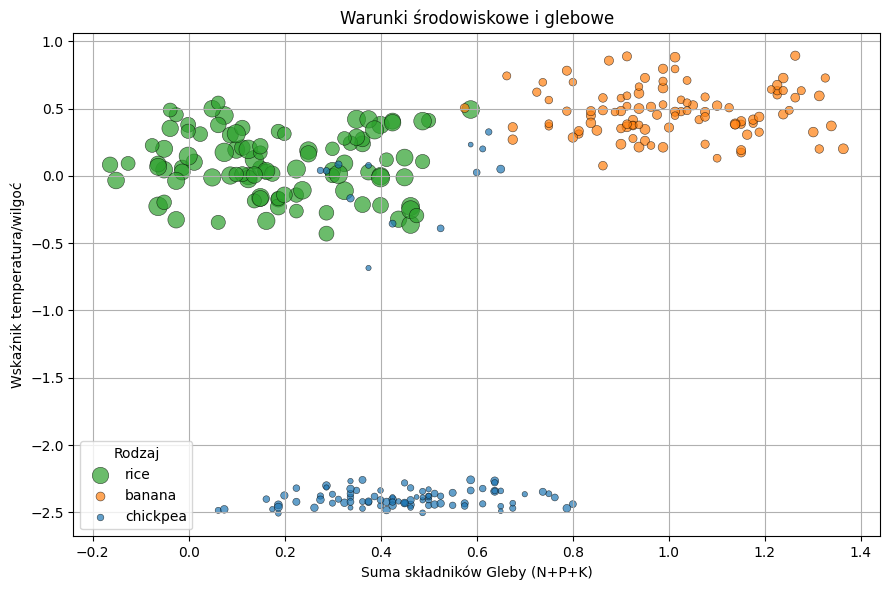

In [ ]:
import matplotlib.pyplot as plt

colors = {'rice':'#2ca02c', 'banana':'#ff7f0e', 'chickpea':'#1f77b4'}
selected_crops = df[df['label'].isin(colors)]
plt.figure(figsize=(9,6))

for crop, color in colors.items():
    selected_crop = selected_crops[selected_crops['label']==crop]
    plt.scatter(selected_crop['total_nutrients'], selected_crop['temp_humidity_index'],
                s=(selected_crop['rainfall'] + 1)*40, color=color, alpha=0.7,
                edgecolors='k', linewidths=0.4, label=crop)

plt.title('Warunki środowiskowe i glebowe')
plt.xlabel('Suma składników Gleby (N+P+K)')
plt.ylabel('Wskaźnik temperatura/wilgoć')
plt.legend(title='Rodzaj')
plt.grid()
plt.tight_layout()
plt.show()

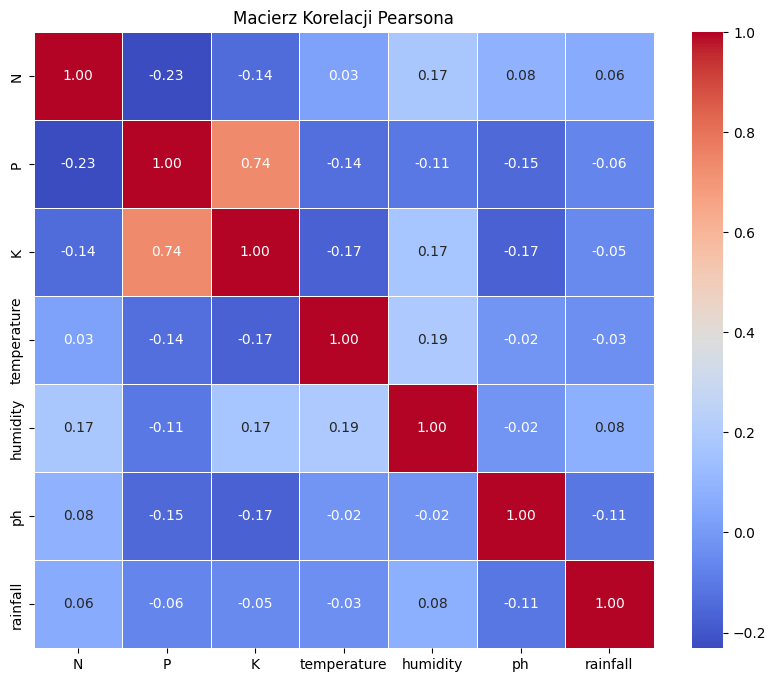

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df_features = df[features]


corr_matrix = df_features.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=.5)
plt.title('Macierz Korelacji Pearsona')
plt.show()

Jedyną  istotną liniową zależnością w danych jest silny związek między fosforem (P) a potasem (K). Pozostałe cechy nie wykazują silnych liniowych powiązań.

Rozpoczynam generowanie pairplota... To może zająć chwilę.


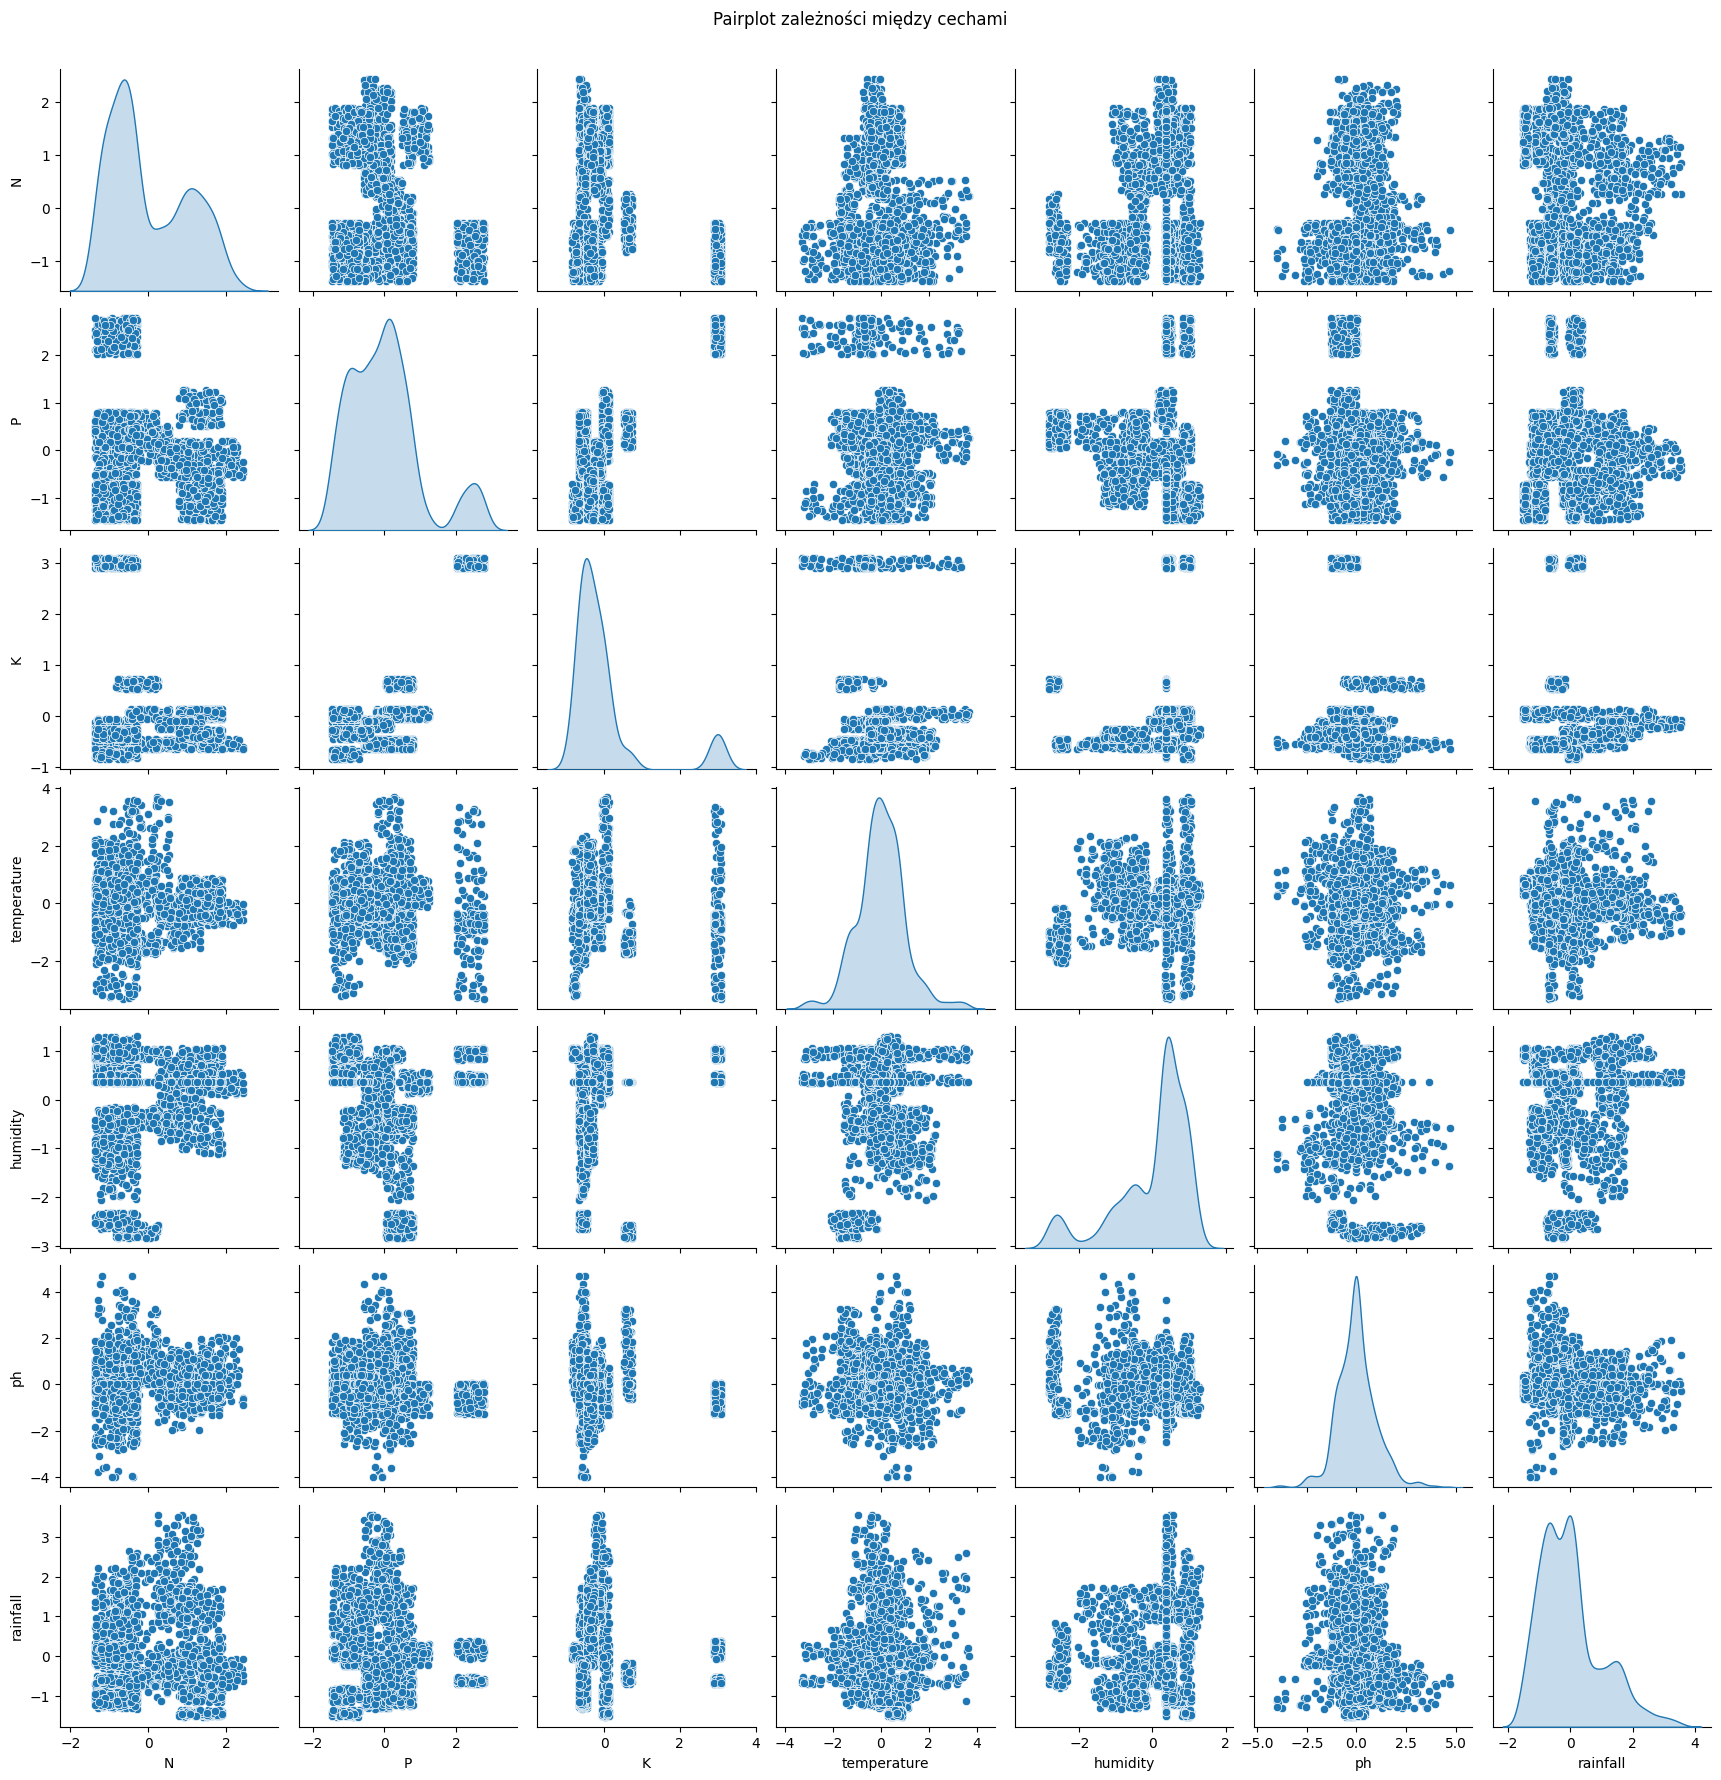

Pairplot wygenerowany.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#df_features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

print("Rozpoczynam generowanie pairplota... To może zająć chwilę.")



g = sns.pairplot(df_features, diag_kind='kde')

g.fig.suptitle('Pairplot zależności między cechami', y=1.02)

plt.show()

print("Pairplot wygenerowany.")

* temperature i ph: Mają rozkłady najbardziej zbliżone do "dzwonu" (rozkładu normalnego). Są dość symetryczne.
* N (Azot) i rainfall (Opady): Są wyraźnie prawoskośne. Oznacza to, że większość wartości jest niska, ale istnieje "długi ogon" z kilkoma bardzo wysokimi wartościami. (Dla rainfall to bardzo logiczne – większość opadów jest umiarkowana, ale zdarzają się ekstremalne ulewy).
* humidity (Wilgotność): Wykres jest bimodalny (ma dwa wyraźne szczyty). Sugeruje to, że dane pochodzą z dwóch różnych środowisk – jednego o bardzo wysokiej wilgotności i drugiego o średniej/niskiej.
* P (Fosfor) i K (Potas): Mają rozkłady wielomodalne (wiele szczytów).

wnioski:
prawie nie ma prostych zależności liniowych.
Klastrowanie (Grupy punktów): Zamiast losowych chmur, punkty tworzą wyraźne klastry (grupy). Zwłaszcza:

    P vs K

    N vs P

    N vs K

    humidity vs temperature (potwierdza podział na dwie grupy wilgotności)


/tmp/ipython-input-4050002440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_features, x=column, orient='h', palette='pastel')
/tmp/ipython-input-4050002440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_features, x=column, orient='h', palette='pastel')
/tmp/ipython-input-4050002440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_features, x=column, orient='h', palette='pastel')
/tmp/ipython-input-4050002440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

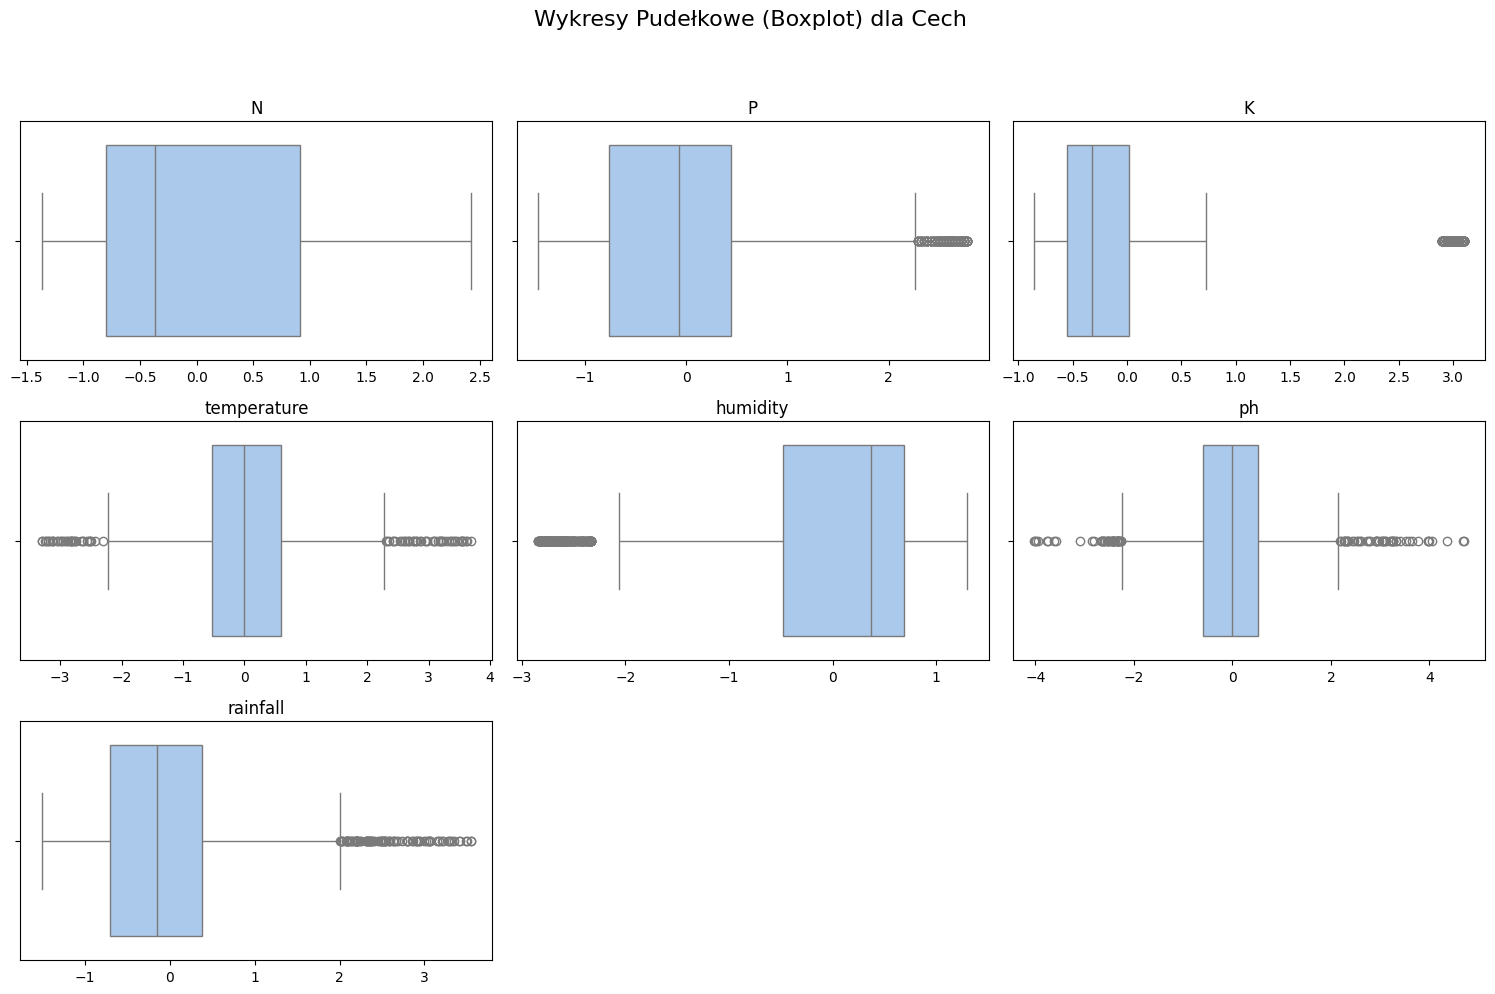

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))
plt.suptitle('Wykresy Pudełkowe (Boxplot) dla Cech', fontsize=16, y=1.02)

for i, column in enumerate(df_features.columns):

    ax = plt.subplot(3, 3, i + 1)

    sns.boxplot(data=df_features, x=column, orient='h', palette='pastel')

    ax.set_title(column)
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [ ]:
import pandas as pd
import numpy as np

cols_to_scale = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                 'N_P_ratio', 'temp_humidity_index', 'total_nutrients']

df_original = pd.read_csv('./Crop_recommendation.csv')
df_with_missing = add_missing_values(df_original, 'ph', random_state=10)
df_with_missing = add_missing_values(df_with_missing, 'temperature', missing_frac=0.10, random_state=10)
df_imputed = add_missing_values(df_with_missing, 'humidity', missing_frac=0.17, random_state=10)

df_imputed['ph'] = df_imputed['ph'].fillna(df_imputed['ph'].mean())
df_imputed['humidity'] = df_imputed['humidity'].fillna(df_imputed['humidity'].median())
df_imputed['temperature'] = df_imputed['temperature'].fillna(df_imputed['temperature'].mean())

df_imputed['N_P_ratio'] = df_imputed['N'] / (df_imputed['P'] + 0.00001)
df_imputed['temp_humidity_index'] = df_imputed['temperature'] * df_imputed['humidity'] / 100
df_imputed['total_nutrients'] = df_imputed['N'] + df_imputed['P'] + df_imputed['K']

In [ ]:
def manual_min_max_scaler(df, cols_to_scale):

    df_scaled = df.copy()

    for col in cols_to_scale:
        min_val = df_scaled[col].min()
        max_val = df_scaled[col].max()
        range_val = max_val - min_val


        if range_val == 0:
            df_scaled[col] = 0
        else:
            df_scaled[col] = (df_scaled[col] - min_val) / range_val

    return df_scaled

print("--- Wynik skalowania Min-Max (Normalizacja) ---")
df_min_max_scaled = manual_min_max_scaler(df_imputed, cols_to_scale)
print(df_min_max_scaled[cols_to_scale].describe())

--- Wynik skalowania Min-Max (Normalizacja) ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      0.361084     0.345448     0.215745     0.471899     0.685963   
std       0.263695     0.235613     0.253240     0.140775     0.241418   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.150000     0.164286     0.075000     0.399689     0.570292   
50%       0.264286     0.328571     0.135000     0.471899     0.774612   
75%       0.601786     0.450000     0.220000     0.545662     0.852490   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                ph     rainfall    N_P_ratio  temp_humidity_index  \
count  2200.000000  2200.000000  2200.000000          2200.000000   
mean      0.461105     0.299094     0.071500             0.429499   
std       0.114790     0.197444     0.108123             0.170396   
min      

In [ ]:
def manual_standard_scaler(df, cols_to_scale):

    df_scaled = df.copy()

    for col in cols_to_scale:
        mean_val = df_scaled[col].mean()
        std_val = df_scaled[col].std()

        if std_val == 0:
            df_scaled[col] = 0
        else:
            df_scaled[col] = (df_scaled[col] - mean_val) / std_val

    return df_scaled

print("\n--- Wynik Standaryzacji (Z-score) ---")

df_standard_scaled = manual_standard_scaler(df_imputed, cols_to_scale)
print(df_standard_scaled[cols_to_scale].describe())


--- Wynik Standaryzacji (Z-score) ---
                  N             P             K   temperature      humidity  \
count  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03   
mean  -7.751375e-17  7.751375e-17  2.583792e-17  2.196223e-16 -1.291896e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.369325e+00 -1.466164e+00 -8.519418e-01 -3.352145e+00 -2.841389e+00   
25%   -8.004863e-01 -7.688964e-01 -5.557797e-01 -5.129463e-01 -4.791317e-01   
50%   -3.670855e-01 -7.162844e-02 -3.188500e-01  0.000000e+00  3.672006e-01   
75%    9.128011e-01  4.437436e-01  1.680047e-02  5.239752e-01  6.897845e-01   
max    2.422932e+00  2.778076e+00  3.096887e+00  3.751375e+00  1.300800e+00   

                 ph      rainfall     N_P_ratio  temp_humidity_index  \
count  2.200000e+03  2.200000e+03  2.200000e+03         2.200000e+03   
mean  -6.459479e-17  1.421085e-16  5.167584e-17         2.067033e-16   
std    1.000000e+00  1.000000e+00

In [ ]:
cols_to_scale = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                 'N_P_ratio', 'temp_humidity_index', 'total_nutrients']

df_imputed_features = df.copy()

In [ ]:
import numpy as np

def manual_min_max_scaler(df, cols_to_scale):
    """
    Ręcznie implementuje skalowanie Min-Max (Normalizację)
    dla wybranych kolumn DataFrame, zgodnie ze wzorem.
    """
    df_scaled = df.copy()

    for col in cols_to_scale:
        min_val = df_scaled[col].min()
        max_val = df_scaled[col].max()
        range_val = max_val - min_val


        if range_val == 0:
            df_scaled[col] = 0
        else:
            df_scaled[col] = (df_scaled[col] - min_val) / range_val

    return df_scaled


df_min_max_scaled = manual_min_max_scaler(df_imputed_features, cols_to_scale)

print("--- Wynik skalowania Min-Max (Normalizacja) ---")

print(df_min_max_scaled[cols_to_scale].describe())

--- Wynik skalowania Min-Max (Normalizacja) ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      0.361084     0.345448     0.215745     0.472326     0.685963   
std       0.263695     0.235613     0.253240     0.143039     0.241418   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.150000     0.164286     0.075000     0.396006     0.570292   
50%       0.264286     0.328571     0.135000     0.471925     0.774612   
75%       0.601786     0.450000     0.220000     0.556908     0.852490   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                ph     rainfall    N_P_ratio  temp_humidity_index  \
count  2200.000000  2200.000000  2200.000000          2200.000000   
mean      0.461105     0.299094     0.071500             0.429807   
std       0.114790     0.197444     0.108123             0.171457   
min      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [ ]:
try:
    df_original = pd.read_csv('Crop_recommendation.csv')
    print("Pomyślnie wczytano plik 'Crop_recommendation.csv'.")
except FileNotFoundError:
    print("BŁĄD: Nie znaleziono pliku 'Crop_recommendation.csv'. Upewnij się, że jest wgrany.")


def add_missing_values(df, col_name, missing_frac=0.1, random_state=42):
    np.random.seed(random_state)
    df_new = df.copy()
    n_missing = int(len(df_new) * missing_frac)
    missing_indices = np.random.choice(df_new.index, n_missing, replace=False)
    df_new.loc[missing_indices, col_name] = np.nan
    return df_new

df_with_missing = add_missing_values(df_original, 'ph', missing_frac=0.1, random_state=10)
df_with_missing = add_missing_values(df_with_missing, 'temperature', missing_frac=0.10, random_state=10)
df_with_missing = add_missing_values(df_with_missing, 'humidity', missing_frac=0.17, random_state=10)

print("\nStworzono bazowy DataFrame z brakującymi danymi (df_with_missing):")
print(df_with_missing.isnull().sum())

numeric_cols = df_original.select_dtypes(include=np.number).columns
label_col = 'label'
feature_cols = [col for col in numeric_cols if col != label_col]

Pomyślnie wczytano plik 'Crop_recommendation.csv'.

Stworzono bazowy DataFrame z brakującymi danymi (df_with_missing):
N                0
P                0
K                0
temperature    220
humidity       374
ph             220
rainfall         0
label            0
dtype: int64


In [ ]:
imputed_datasets = {}


print("Tworzenie zbioru 1: Imputacja średnią...")
imputer_mean = SimpleImputer(strategy='mean')
df_mean = df_with_missing.copy()
df_mean[feature_cols] = imputer_mean.fit_transform(df_mean[feature_cols])
imputed_datasets['mean'] = df_mean


print("Tworzenie zbioru 2: Imputacja medianą...")
imputer_median = SimpleImputer(strategy='median')
df_median = df_with_missing.copy()
df_median[feature_cols] = imputer_median.fit_transform(df_median[feature_cols])
imputed_datasets['median'] = df_median


print("Tworzenie zbioru 3: Imputacja KNN...")
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = df_with_missing.copy()
df_knn[feature_cols] = imputer_knn.fit_transform(df_knn[feature_cols])
imputed_datasets['knn'] = df_knn


print("Tworzenie zbioru 4: Twoja metoda mieszana (RF)...")
df_mixed = df_with_missing.copy()


df_mixed['ph'] = df_mixed['ph'].fillna(df_mixed['ph'].mean())


df_mixed['humidity'] = df_mixed['humidity'].fillna(df_mixed['humidity'].median())

df_temp_known = df_mixed[df_mixed['temperature'].notnull()]
df_temp_missing = df_mixed[df_mixed['temperature'].isnull()]
predictors = ['N', 'P', 'K', 'humidity', 'ph', 'rainfall']
X_train = df_temp_known[predictors]
y_train = df_temp_known['temperature']
X_test = df_temp_missing[predictors]

rf = RandomForestRegressor(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)
predicted_temp = rf.predict(X_test)
df_mixed.loc[df_mixed['temperature'].isnull(), 'temperature'] = predicted_temp
imputed_datasets['mixed'] = df_mixed

print("\nZakończono tworzenie 4 zbiorów po imputacji.")

Tworzenie zbioru 1: Imputacja średnią...
Tworzenie zbioru 2: Imputacja medianą...
Tworzenie zbioru 3: Imputacja KNN...
Tworzenie zbioru 4: Twoja metoda mieszana (RF)...

Zakończono tworzenie 4 zbiorów po imputacji.


In [ ]:
def add_new_features(df):
    df_feat = df.copy()
    df_feat['N_P_ratio'] = df_feat['N'] / (df_feat['P'] + 0.00001)
    df_feat['temp_humidity_index'] = df_feat['temperature'] * df_feat['humidity'] / 100
    df_feat['total_nutrients'] = df_feat['N'] + df_feat['P'] + df_feat['K']
    return df_feat

cols_to_scale = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                 'N_P_ratio', 'temp_humidity_index', 'total_nutrients']

In [ ]:
def add_new_features(df):
    df_feat = df.copy()
    df_feat['N_P_ratio'] = df_feat['N'] / (df_feat['P'] + 0.00001)
    df_feat['temp_humidity_index'] = df_feat['temperature'] * df_feat['humidity'] / 100
    df_feat['total_nutrients'] = df_feat['N'] + df_feat['P'] + df_feat['K']
    return df_feat


cols_to_scale = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                 'N_P_ratio', 'temp_humidity_index', 'total_nutrients']

In [ ]:
def manual_min_max_scaler(df, cols_to_scale):
    """
    Ręcznie implementuje skalowanie Min-Max (Normalizację) [0, 1]
    Wzór: X_scaled = (X - X_min) / (X_max - X_min)
    """
    df_scaled = df.copy()
    for col in cols_to_scale:
        min_val = df_scaled[col].min()
        max_val = df_scaled[col].max()
        range_val = max_val - min_val
        if range_val == 0:
            df_scaled[col] = 0
        else:
            df_scaled[col] = (df_scaled[col] - min_val) / range_val
    return df_scaled

def manual_standard_scaler(df, cols_to_scale):
    """
    Ręcznie implementuje standaryzację Z-score (średnia=0, std=1)
    Wzór: X_scaled = (X - mean) / std_dev
    """
    df_scaled = df.copy()
    for col in cols_to_scale:
        mean_val = df_scaled[col].mean()
        std_val = df_scaled[col].std()
        if std_val == 0:
            df_scaled[col] = 0
        else:
            df_scaled[col] = (df_scaled[col] - mean_val) / std_val
    return df_scaled

print("Zdefiniowano funkcje manual_min_max_scaler i manual_standard_scaler.")

Zdefiniowano funkcje manual_min_max_scaler i manual_standard_scaler.


In [ ]:
print("Generowanie 8 końcowych zbiorów (4x2)...")

featured_datasets = {}
final_datasets = {}

for name, df in imputed_datasets.items():

    df_featured = add_new_features(df)
    featured_datasets[name] = df_featured


    df_minmax = manual_min_max_scaler(df_featured, cols_to_scale)
    final_datasets[f'{name}_minmax'] = df_minmax


    df_standard = manual_standard_scaler(df_featured, cols_to_scale)
    final_datasets[f'{name}_standard'] = df_standard

print("\n--- GOTOWE! (4x2=8) ---")
print("Utworzono 8 zbiorów DataFrame. Są one dostępne w słowniku 'final_datasets'.")
print("Klucze w 'final_datasets':", list(final_datasets.keys()))
print("\nUtworzono 4 zbiory po imputacji i inżynierii cech (przed skalowaniem).")
print("Klucze w 'featured_datasets':", list(featured_datasets.keys()))

print("\n--- Dowód: describe() dla 'mixed_minmax' ---")
print(final_datasets['mixed_minmax'][cols_to_scale].describe())

Generowanie 8 końcowych zbiorów (4x2)...

--- GOTOWE! (4x2=8) ---
Utworzono 8 zbiorów DataFrame. Są one dostępne w słowniku 'final_datasets'.
Klucze w 'final_datasets': ['mean_minmax', 'mean_standard', 'median_minmax', 'median_standard', 'knn_minmax', 'knn_standard', 'mixed_minmax', 'mixed_standard']

Utworzono 4 zbiory po imputacji i inżynierii cech (przed skalowaniem).
Klucze w 'featured_datasets': ['mean', 'median', 'knn', 'mixed']

--- Dowód: describe() dla 'mixed_minmax' ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      0.361084     0.345448     0.215745     0.472319     0.685963   
std       0.263695     0.235613     0.253240     0.143423     0.241418   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.150000     0.164286     0.075000     0.394930     0.570292   
50%       0.264286     0.328571     0.135000     0.470713     0.774612 

Generowanie wykresów porównawczych dla metod imputacji...


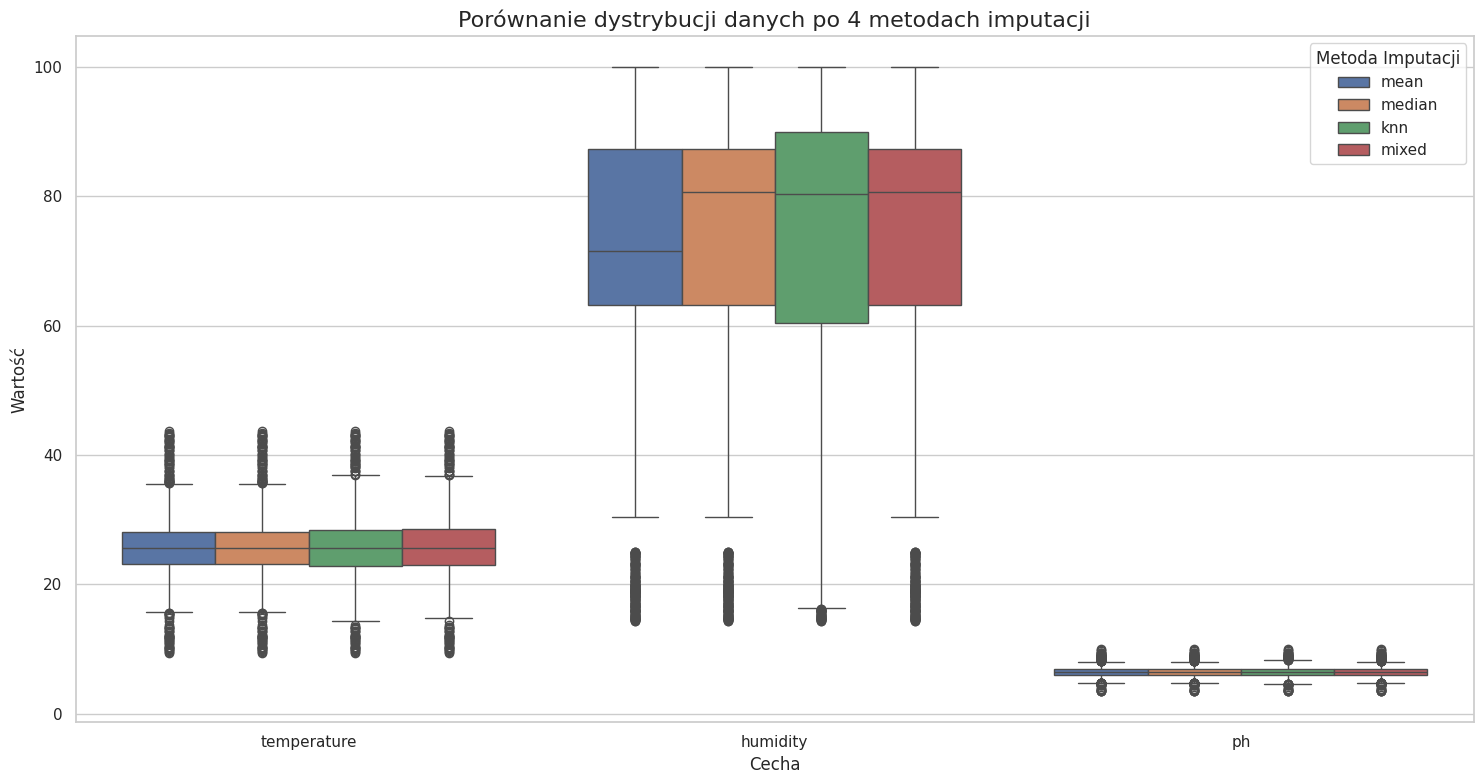

In [ ]:
print("Generowanie wykresów porównawczych dla metod imputacji...")

cols_to_compare = ['temperature', 'humidity', 'ph']
comparison_list = []

for name, df in featured_datasets.items():
    df_temp = df[cols_to_compare].copy()
    df_temp['imputation_method'] = name
    comparison_list.append(df_temp)

df_compare_imputation = pd.concat(comparison_list)


df_melted_imputation = df_compare_imputation.melt(id_vars=['imputation_method'],
                                                  value_vars=cols_to_compare,
                                                  var_name='feature',
                                                  value_name='value')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_melted_imputation, x='feature', y='value', hue='imputation_method')
plt.title('Porównanie dystrybucji danych po 4 metodach imputacji', fontsize=16)
plt.xlabel('Cecha')
plt.ylabel('Wartość')
plt.legend(title='Metoda Imputacji')
plt.tight_layout()
plt.show()

Generowanie wykresów porównawczych dla metod skalowania...


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

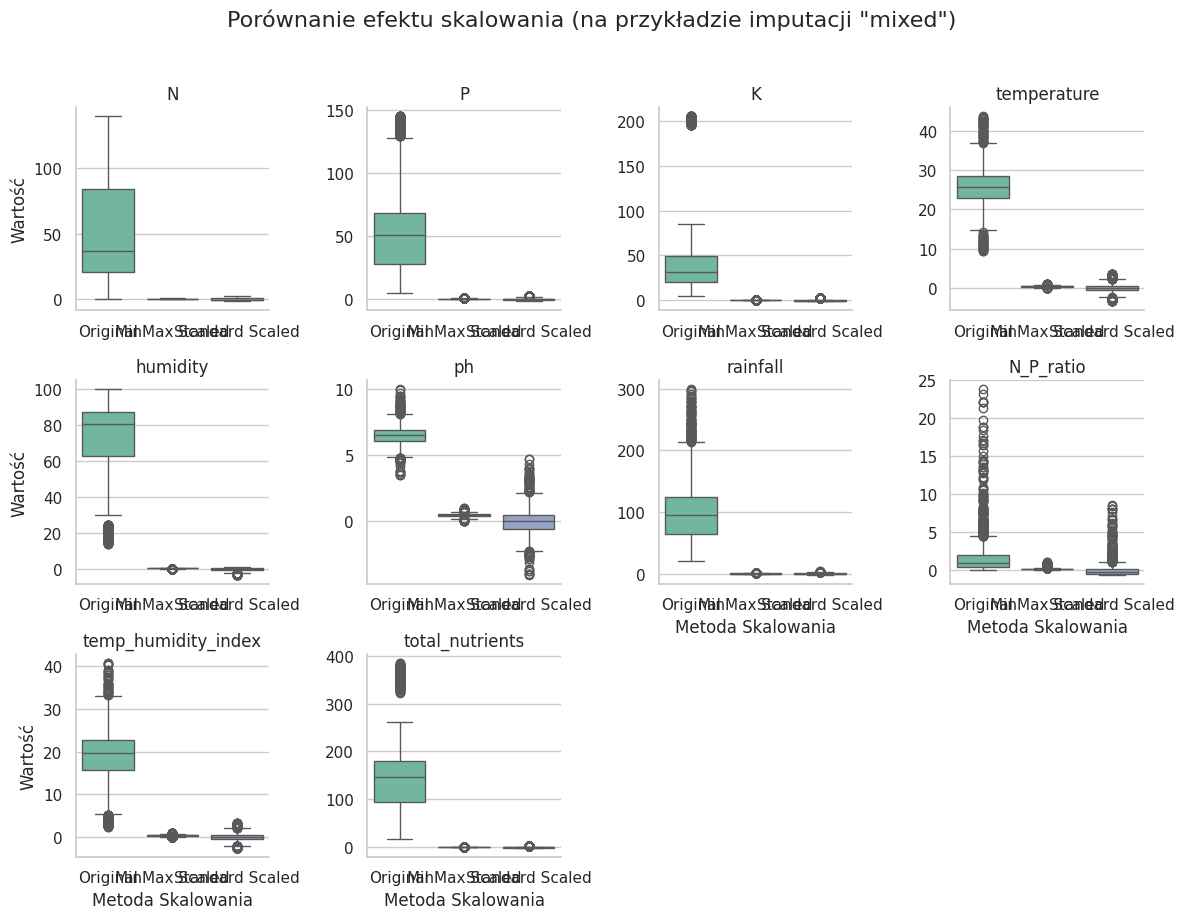

In [ ]:
print("Generowanie wykresów porównawczych dla metod skalowania...")


df_unscaled = featured_datasets['mixed'][cols_to_scale]
df_minmax = final_datasets['mixed_minmax'][cols_to_scale]
df_standard = final_datasets['mixed_standard'][cols_to_scale]


data_to_melt = {
    'Original': df_unscaled,
    'MinMax Scaled': df_minmax,
    'Standard Scaled': df_standard
}

comparison_list_scaling = []
for name, df in data_to_melt.items():
    df_melted_temp = df.melt(var_name='feature', value_name='value')
    df_melted_temp['scaling_method'] = name
    comparison_list_scaling.append(df_melted_temp)

df_compare_scaling = pd.concat(comparison_list_scaling)


g = sns.FacetGrid(df_compare_scaling, col="feature", col_wrap=4, sharey=False, sharex=False)
g.map(sns.boxplot, "scaling_method", "value", order=['Original', 'MinMax Scaled', 'Standard Scaled'], palette="Set2")
g.fig.suptitle('Porównanie efektu skalowania (na przykładzie imputacji "mixed")', y=1.02, fontsize=16)
g.set_titles("{col_name}")
g.set_axis_labels("Metoda Skalowania", "Wartość")
plt.tight_layout()
plt.show()

#Cz. 2

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('Crop_recommendation.csv')

#odtworzenie Feature Engineeringu z notatnika 1
df['N_P_ratio'] = df['N'] / (df['P'] + 0.00001)  #dodane epsilon, żeby nie dzielić przez 0
df['temp_humidity_index'] = df['temperature'] * df['humidity'] / 100
df['total_nutrients'] = df['N'] + df['P'] + df['K']


X = df.drop('label', axis=1)
y = df['label']

print("Dane przygotowane (cechy odtworzone).")
print("Nowe kolumny:", ['N_P_ratio', 'temp_humidity_index', 'total_nutrients'])
df.head(3)

Dane przygotowane (cechy odtworzone).
Nowe kolumny: ['N_P_ratio', 'temp_humidity_index', 'total_nutrients']


N   P   K  temperature   humidity        ph    rainfall label  N_P_ratio  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   2.142857   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   1.465517   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   1.090909   

   temp_humidity_index  total_nutrients  
0            17.121963              175  
1            17.485957              184  
2            18.937446              159

Ręczna implementacja podziału na zbiór treningowy i testowy.
Zapewnia, że każda klasa (np. 'rice', 'maize') jest równo reprezentowana.

In [ ]:
def manual_stratified_split(X, y, test_size=0.2, random_state=42):

    np.random.seed(random_state)

    train_idxs = []
    test_idxs = []


    unique_classes = np.unique(y)

    for cls in unique_classes:
        cls_indices = np.where(y == cls)[0]
        np.random.shuffle(cls_indices)
        n_test = int(len(cls_indices) * test_size)
        test_idxs.extend(cls_indices[:n_test])
        train_idxs.extend(cls_indices[n_test:])
    np.random.shuffle(train_idxs)
    np.random.shuffle(test_idxs)

    return X.iloc[train_idxs], X.iloc[test_idxs], y.iloc[train_idxs], y.iloc[test_idxs]

X_train, X_test, y_train, y_test = manual_stratified_split(X, y, test_size=0.2)

print(f"Zbiór treningowy: {X_train.shape}")
print(f"Zbiór testowy:    {X_test.shape}")

Zbiór treningowy: (1760, 10)
Zbiór testowy:    (440, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Oblicza metryki ręcznie i opcjonalnie (verbose=True) wyświetla szczegóły:
*   Raport dla każdej klasy osobno
*   Macierz pomyłek

In [ ]:
def manual_metrics_calc(y_true, y_pred, verbose=True):

    #mapa klas
    classes = np.unique(np.concatenate([y_true, y_pred]))
    class_map = {cls: i for i, cls in enumerate(classes)}
    n = len(classes)

    #Confusion Matrix
    cm = np.zeros((n, n), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[class_map[t]][class_map[p]] += 1

    accuracy = np.trace(cm) / np.sum(cm)

    precisions, recalls, f1s = [], [], []

    report_data = []

    for i, class_name in enumerate(classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp

        p = tp / (tp + fp) if (tp + fp) > 0 else 0
        r = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2*p*r / (p + r) if (p + r) > 0 else 0

        precisions.append(p)
        recalls.append(r)
        f1s.append(f1)

        report_data.append({
            'Class': class_name,
            'Precision': round(p, 4),
            'Recall': round(r, 4),
            'F1 Score': round(f1, 4),
            'Support (Count)': tp + fn
        })


    if verbose:
        print(f"Ogólne Accuracy: {accuracy:.4f}")

        #tabela z wynikami per klasa
        df_report = pd.DataFrame(report_data).set_index('Class')
        print("\nSzczegółowe wyniki dla każdej klasy:")
        display(df_report)

        if n <= 25:
            print("\nMacierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):")
            df_cm = pd.DataFrame(cm, index=classes, columns=classes)


            try:
                display(df_cm.style.background_gradient(cmap='Blues', axis=None))
            except:
                display(df_cm)

    return {
        'Accuracy': accuracy,
        'Precision': np.mean(precisions),
        'Recall': np.mean(recalls),
        'F1 Score': np.mean(f1s)
    }

Próbne sprawdzenie dla DecisionTreeClassifier jak działa wyświetlanie tabel etc.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
preds = model.predict(X_test_scaled)

In [ ]:
wyniki = manual_metrics_calc(y_test, preds, verbose=True)

Ogólne Accuracy: 0.9932

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       0.9524    1.00    0.9756               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9500    0.95    0.9500               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          1.0000    1.00    1.0000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    0.95    0.9744               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    1.00    1.0000               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            0.9500    0.95    0.9500               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


##Faktyczne modele i testy

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

XGBoost i LightGBM wymagają etykiet liczbowych (0, 1, 2...), a nie nazw ('rice')

In [11]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
models = {
    #modele scikit-learn
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),

    #mdele zewn
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(verbose=-1),

    #modele zespołowe
    'Voting (Soft)': VotingClassifier(
        estimators=[
            ('dt', DecisionTreeClassifier()),
            ('rf', RandomForestClassifier()),
            ('knn', KNeighborsClassifier())
        ], voting='soft'
    ),
    'Stacking': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=50)),
            ('knn', KNeighborsClassifier())
        ], final_estimator=LogisticRegression()
    )
}

In [ ]:
summary_results = []


for name, model in models.items():
    print(f"Trening: {name}...")

    if name in ['XGBoost', 'LightGBM']:
        #te modele dostają wersję liczbową
        model.fit(X_train_scaled, y_train_enc)
        preds_enc = model.predict(X_test_scaled)
        #odkodowanie wynik do nazw, żeby funkcja metryk zadziałała tak samo dla wszystkich
        preds = le.inverse_transform(preds_enc)
    else:
        #reszta dostaje normalne nazwy
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)


    #obliczenie metryk (użycie funkcji z verbose=False)
    #metrics = manual_metrics_calc(y_test, preds, verbose=False)
    metrics = manual_metrics_calc(y_test, preds, verbose=True) #widok 7 tabel

    summary_results.append({
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score']
    })

Trening: Decision Tree...
Ogólne Accuracy: 0.9932

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       0.9524    1.00    0.9756               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9500    0.95    0.9500               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          1.0000    1.00    1.0000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    0.95    0.9744               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    1.00    1.0000               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            0.9500    0.95    0.9500               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


Trening: Random Forest...
Ogólne Accuracy: 0.9977

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       1.0000    1.00    1.0000               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9524    1.00    0.9756               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          1.0000    1.00    1.0000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    1.00    1.0000               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    1.00    1.0000               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            1.0000    0.95    0.9744               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


Trening: KNN...
Ogólne Accuracy: 0.9727

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       0.8636    0.95    0.9048               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.8261    0.95    0.8837               20
kidneybeans     0.9524    1.00    0.9756               20
lentil          0.9000    0.90    0.9000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    0.90    0.9474               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    0.95    0.9744               20
papaya          1.0000    0.95    0.9744               20
pigeonpeas      1.0000    0.95    0.9744               20
pomegranate     0.9524    1.00    0.9756               20
rice            0.9444    0.85    0.8947               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


Trening: XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:58:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ogólne Accuracy: 0.9977

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       1.0000    1.00    1.0000               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9524    1.00    0.9756               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          1.0000    1.00    1.0000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    1.00    1.0000               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    1.00    1.0000               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            1.0000    0.95    0.9744               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


Trening: LightGBM...
Ogólne Accuracy: 0.9977

Szczegółowe wyniki dla każdej klasy:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       1.0000    1.00    1.0000               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9524    1.00    0.9756               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          1.0000    1.00    1.0000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    1.00    1.0000               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    1.00    1.0000               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            1.0000    0.95    0.9744               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


Trening: Voting (Soft)...
Ogólne Accuracy: 0.9932

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       0.9524    1.00    0.9756               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9500    0.95    0.9500               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          1.0000    1.00    1.0000               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    0.95    0.9744               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    1.00    1.0000               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            0.9500    0.95    0.9500               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


Trening: Stacking...
Ogólne Accuracy: 0.9909

Szczegółowe wyniki dla każdej klasy:


Precision  Recall  F1 Score  Support (Count)
Class                                                    
apple           1.0000    1.00    1.0000               20
banana          1.0000    1.00    1.0000               20
blackgram       0.9500    0.95    0.9500               20
chickpea        1.0000    1.00    1.0000               20
coconut         1.0000    1.00    1.0000               20
coffee          1.0000    1.00    1.0000               20
cotton          1.0000    1.00    1.0000               20
grapes          1.0000    1.00    1.0000               20
jute            0.9091    1.00    0.9524               20
kidneybeans     1.0000    1.00    1.0000               20
lentil          0.9524    1.00    0.9756               20
maize           1.0000    1.00    1.0000               20
mango           1.0000    1.00    1.0000               20
mothbeans       1.0000    0.95    0.9744               20
mungbean        1.0000    1.00    1.0000               20
muskmelon       1.0000    1.00    1.0000               20
orange          1.0000    1.00    1.0000               20
papaya          1.0000    0.95    0.9744               20
pigeonpeas      1.0000    1.00    1.0000               20
pomegranate     1.0000    1.00    1.0000               20
rice            1.0000    0.95    0.9744               20
watermelon      1.0000    1.00    1.0000               20


Macierz Pomyłek (Wiersze: Prawdziwe, Kolumny: Przewidziane):


In [ ]:
results_df = pd.DataFrame(summary_results).set_index('Model')
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("\nRanking modeli")
display(results_df)
#display(results_df.style.highlight_max(color='lightgreen', axis=0))


Ranking modeli


Accuracy  Precision    Recall  F1 Score
Model                                                 
Random Forest  0.997727   0.997835  0.997727  0.997726
LightGBM       0.997727   0.997835  0.997727  0.997726
XGBoost        0.997727   0.997835  0.997727  0.997726
Voting (Soft)  0.993182   0.993290  0.993182  0.993180
Decision Tree  0.993182   0.993290  0.993182  0.993180
Stacking       0.990909   0.991431  0.990909  0.990958
KNN            0.972727   0.974497  0.972727  0.972949

/tmp/ipython-input-1935057371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['F1 Score'], y=results_df.index, palette='viridis')


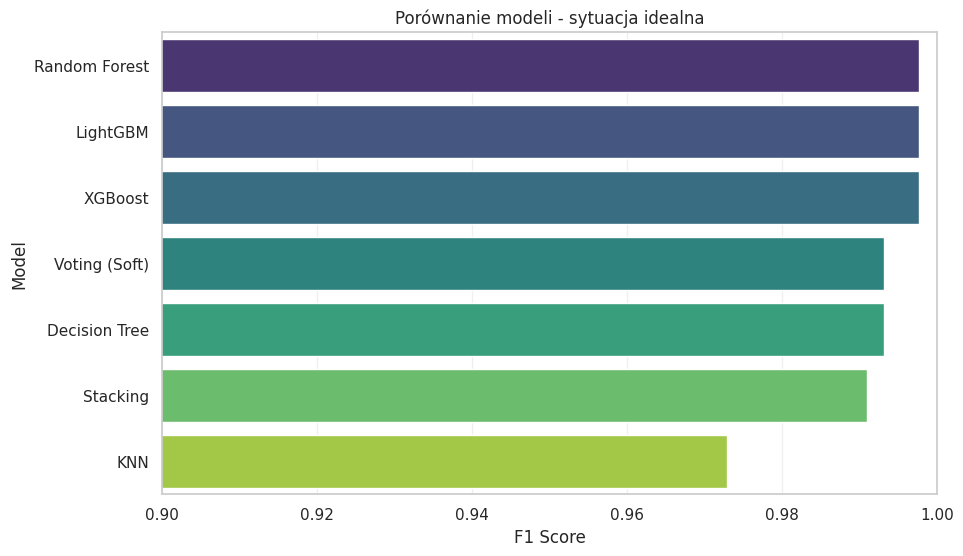

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df['F1 Score'], y=results_df.index, palette='viridis')
plt.title('Porównanie modeli - sytuacja idealna')
plt.xlabel('F1 Score')
plt.xlim(0.9, 1.0)
plt.grid(axis='x', alpha=0.3)
plt.show()

Konieczne popsucie danych, aby wyniki były bliższe rzeczywistości

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

Ponowne wczytanie danych i ich popsucie

In [4]:
df_raw = pd.read_csv('Crop_recommendation.csv')

#funkcja psująca dane (szum + braki)
def run_heavy_sabotage(dataframe, random_state=42):
    np.random.seed(random_state)
    df_broken = dataframe.copy()

    #szum
    for col in ['N', 'P', 'K']:
        noise = np.random.normal(0, 8, size=len(df_broken))
        df_broken[col] = (df_broken[col] + noise).clip(lower=0)

    #braki (20-30%)
    for col, frac in [('ph', 0.30), ('humidity', 0.25), ('temperature', 0.20)]:
        n_missing = int(len(df_broken) * frac)
        idx = np.random.choice(df_broken.index, n_missing, replace=False)
        df_broken.loc[idx, col] = np.nan
    return df_broken

df_dirty = run_heavy_sabotage(df_raw)

#naprawa - imputacja
df_dirty['ph'] = df_dirty['ph'].fillna(df_dirty['ph'].mean())
df_dirty['humidity'] = df_dirty['humidity'].fillna(df_dirty['humidity'].median())
df_dirty['temperature'] = df_dirty['temperature'].fillna(df_dirty['temperature'].mean())
#feature engineering
df_dirty['N_P_ratio'] = df_dirty['N'] / (df_dirty['P'] + 0.00001)
df_dirty['total_nutrients'] = df_dirty['N'] + df_dirty['P'] + df_dirty['K']


X = df_dirty.drop('label', axis=1).values
y = df_dirty['label'].values
le = LabelEncoder()
y_enc = le.fit_transform(y)

Trening na nowych "popsutych danych"

podział train/test

In [5]:
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(len(X) * 0.8)
train_idx, test_idx = indices[:split], indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y_enc[train_idx], y_enc[test_idx]

In [39]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=300, learning_rate=0.1, n_jobs=1)

voting = VotingClassifier(
    estimators=[
        ('dt', dt),
        ('rf', rf),
        ('knn', knn)
    ], voting='soft'
)

stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ], final_estimator=LogisticRegression()
)

models = [
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('KNN', knn),
    ('XGBoost', xgb_model),
    ('LightGBM', lgb_model),
    ('Voting (Soft)', voting),
    ('Stacking', stacking)
]

results = []
print("Trenowanie na zepsutych danych")
for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = np.mean(preds == y_test)
    results.append({'Model': name, 'Accuracy': acc})
    print(f"{name}: {acc:.4f}")

best_model_entry = max(results, key=lambda x: x['Accuracy'])
best_model_name = best_model_entry['Model']
winner_model = [m for n, m in models if n == best_model_name][0]
print(f"\nZwycięzca: {best_model_name}")

Trenowanie na zepsutych danych
Decision Tree: 0.8955
Random Forest: 0.9432
KNN: 0.8659


/root/programowanie/gen/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [00:18:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 0.9591


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9614
Voting (Soft): 0.9227
Stacking: 0.9386

Zwycięzca: LightGBM


Walidacja krzyżowa

In [40]:
k = 5
cv_scores = []
fold_size = len(X) // k
ind = np.arange(len(X))
np.random.shuffle(ind)

print(f"\nRęczna Walidacja Krzyżowa (5-fold) dla {best_model_name} ---")
for i in range(k):
    val_indices = ind[i*fold_size : (i+1)*fold_size]
    train_indices = np.concatenate([ind[:i*fold_size], ind[(i+1)*fold_size:]])

    winner_model.fit(X[train_indices], y_enc[train_indices])
    preds = winner_model.predict(X[val_indices])
    score = np.mean(preds == y_enc[val_indices])
    cv_scores.append(score)
    print(f"Fold {i+1}: {score:.4f}")

final_cv_score = np.mean(cv_scores)


Ręczna Walidacja Krzyżowa (5-fold) dla LightGBM ---


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1: 0.9773


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2: 0.9659


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3: 0.9545


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4: 0.9523
Fold 5: 0.9477


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


/tmp/ipykernel_75777/3579806512.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_comp, x='Etap', y='Accuracy', palette=['lightgray', '#e74c3c'])


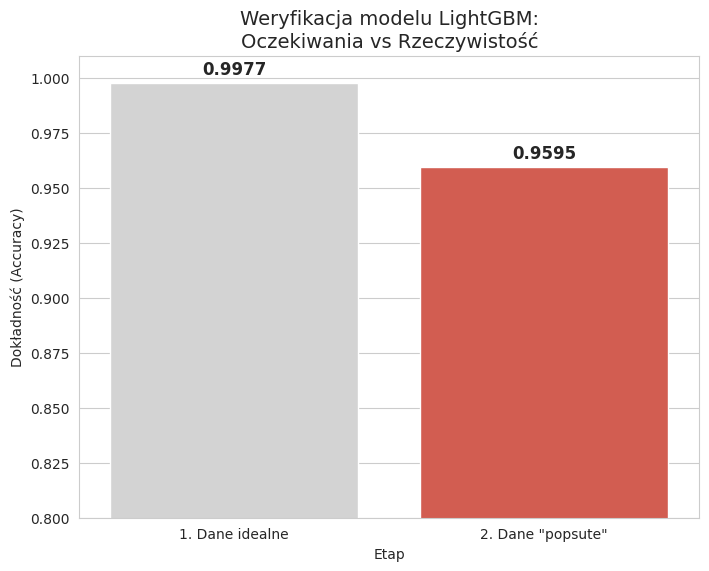

Skuteczność spadła o 3.82 po popsuciu danych.


In [41]:
sns.set_style("whitegrid")

old_perfect_score = 0.9977

df_comp = pd.DataFrame({
    'Etap': ['1. Dane idealne', f'2. Dane "popsute"'],
    'Accuracy': [old_perfect_score, final_cv_score]
})

plt.figure(figsize=(8, 6))
bars = sns.barplot(data=df_comp, x='Etap', y='Accuracy', palette=['lightgray', '#e74c3c'])
plt.title(f'Weryfikacja modelu {best_model_name}:\nOczekiwania vs Rzeczywistość', fontsize=14)
plt.ylim(0.8, 1.01)
plt.ylabel('Dokładność (Accuracy)')

for container in bars.containers:
    bars.bar_label(container, fmt='%.4f', padding=3, fontsize=12, weight='bold')

plt.show()

print(f"Skuteczność spadła o {(old_perfect_score - final_cv_score)*100:.2f} po popsuciu danych.")

/tmp/ipykernel_75777/590745980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')


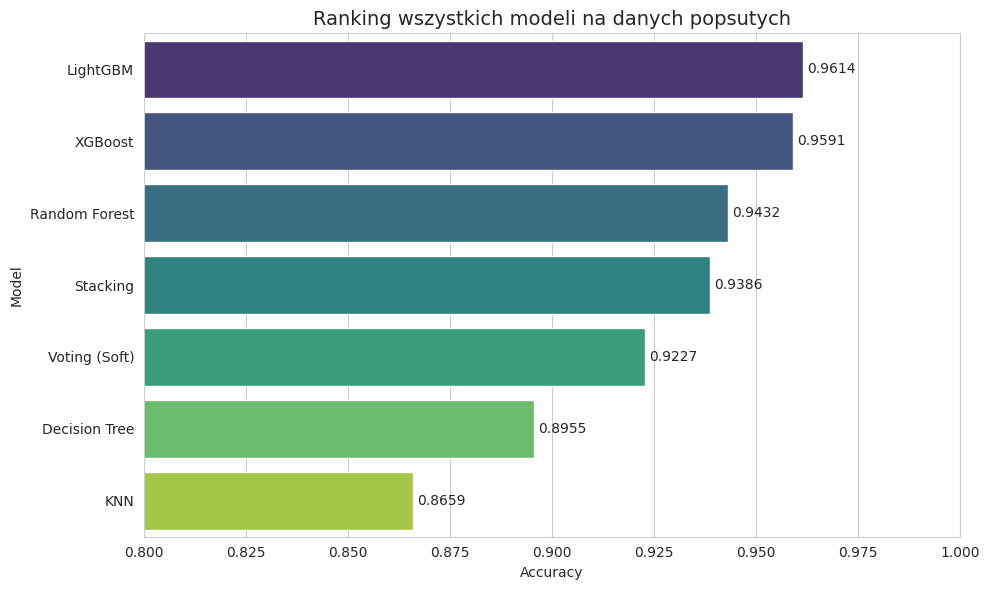

In [42]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Ranking wszystkich modeli na danych popsutych', fontsize=14)
plt.xlim(0.8, 1.0)
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.4f', padding=3)
plt.tight_layout()
plt.show()

## Cz. 3 – Optymalizacja cech i hiperparametrów



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import optuna
from tpot import TPOTClassifier
from deap import base, creator, tools, algorithms
import random
import os

N_JOBS_MODEL = 1
N_JOBS_CV = -1

RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

/root/programowanie/gen/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [ ]:
baseline_models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=1),
    'XGBoost': XGBClassifier(
        random_state=RANDOM_STATE,
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        n_jobs=1
    ),
    'LightGBM': LGBMClassifier(random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.1,
    n_jobs=1)
}

baseline_results = []
for name, model in baseline_models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    cv_res = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=skf,
        scoring={'acc': 'accuracy', 'f1': 'f1_macro'},
        n_jobs=N_JOBS_CV,
        return_train_score=False
    )
    baseline_results.append({
        'Model': name,
        'F1_CV_mean': np.mean(cv_res['test_f1']),
        'ACC_CV_mean': np.mean(cv_res['test_acc']),
        'F1_std': np.std(cv_res['test_f1']),
        'ACC_std': np.std(cv_res['test_acc'])
    })

baseline_df = pd.DataFrame(baseline_results).sort_values(by='F1_CV_mean', ascending=False).reset_index(drop=True)
display(baseline_df)

best_model_name = baseline_df.iloc[0]['Model']
best_model = baseline_models[best_model_name]
best_pipe = Pipeline([('scaler', StandardScaler()), ('model', best_model)])
best_pipe.fit(X_train, y_train)
y_pred_test = best_pipe.predict(X_test)
baseline_test_f1 = f1_score(y_test, y_pred_test, average='macro')
baseline_test_acc = accuracy_score(y_test, y_pred_test)


In [8]:
print(f"Najlepszy baseline: {best_model_name}")
print(f"Test F1: {baseline_test_f1:.4f}, Test ACC: {baseline_test_acc:.4f}")

Najlepszy baseline: LightGBM
Test F1: 0.9546, Test ACC: 0.9591


In [9]:
feature_cols = df_dirty.columns.drop('label')

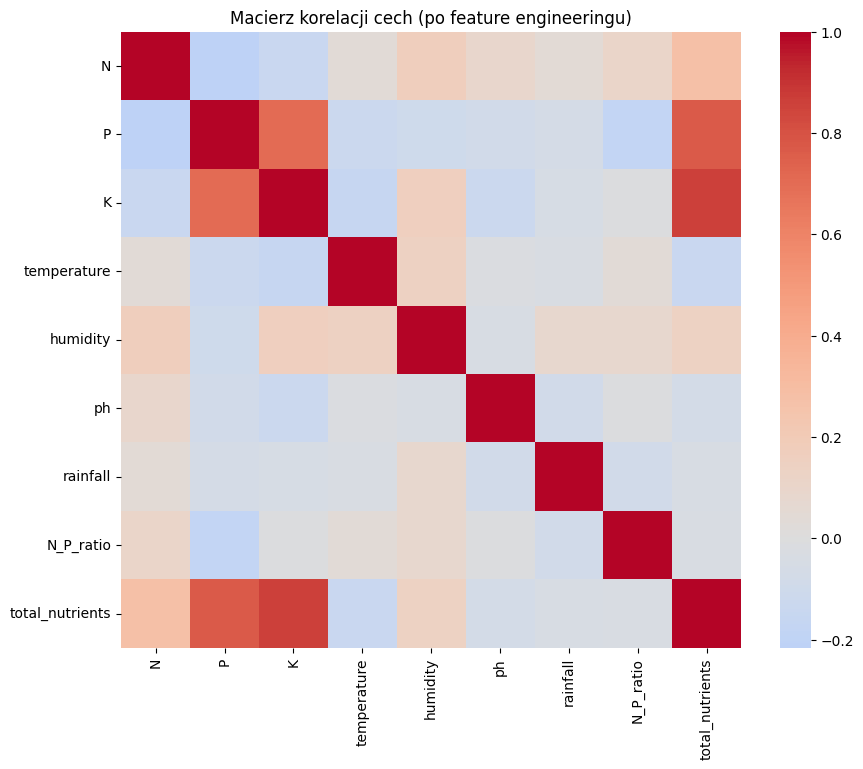

In [10]:


plt.figure(figsize=(10, 8))
sns.heatmap(df_dirty[feature_cols].corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Macierz korelacji cech (po feature engineeringu)')
plt.show()


In [ ]:
# selekcja cech: SelectKBest (mutual information)
k_values = [5, 7, 9]
kbest_results = []
for k in k_values:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    pipe = Pipeline([
        ('selector', selector),
        ('scaler', StandardScaler()),
        ('model', best_model)
    ])
    cv_res = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=skf,
        scoring={'acc': 'accuracy', 'f1': 'f1_macro'},
        n_jobs=N_JOBS_CV
    )
    kbest_results.append({
        'k': k,
        'F1_CV_mean': np.mean(cv_res['test_f1']),
        'ACC_CV_mean': np.mean(cv_res['test_acc'])
    })

kbest_df = pd.DataFrame(kbest_results).sort_values(by='F1_CV_mean', ascending=False).reset_index(drop=True)
display(kbest_df)

best_k = int(kbest_df.iloc[0]['k'])
best_selector = SelectKBest(score_func=mutual_info_classif, k=best_k)
best_selector.fit(X_train, y_train)
kbest_best_features = list(np.array(feature_cols)[best_selector.get_support()])

kbest_pipe = Pipeline([
    ('selector', best_selector),
    ('scaler', StandardScaler()),
    ('model', best_model)
])
kbest_pipe.fit(X_train, y_train)
kbest_test_pred = kbest_pipe.predict(X_test)
kbest_test_f1 = f1_score(y_test, kbest_test_pred, average='macro')


In [12]:
# permutation importance - obliczamy na zbiorze treningowym (z CV)
perm_pipe = Pipeline([('scaler', StandardScaler()), ('model', best_model)])
perm_pipe.fit(X_train, y_train)
perm_res = permutation_importance(
    perm_pipe,
    X_train,  # używamy train zamiast test - lepiej ocenia ważność cech
    y_train,
    scoring='f1_macro',
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS_CV
)
imp_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': perm_res.importances_mean
}).sort_values(by='importance', ascending=False)
display(imp_df.head(10))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 9
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] 

/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

feature  importance
6         rainfall    0.555748
2                K    0.173367
1                P    0.141701
4         humidity    0.098018
8  total_nutrients    0.055644
0                N    0.032404
7        N_P_ratio    0.022429
3      temperature    0.019995
5               ph    0.017607

In [ ]:
# CV i test dla top permutation features
top_perm_features = imp_df.head(4)['feature'].tolist()
top_perm_indices = [list(feature_cols).index(f) for f in top_perm_features]

perm_pipe_top = Pipeline([('scaler', StandardScaler()), ('model', best_model)])
cv_res_perm = cross_validate(
    perm_pipe_top,
    X_train[:, top_perm_indices],
    y_train,
    cv=skf,
    scoring={'acc': 'accuracy', 'f1': 'f1_macro'},
    n_jobs=N_JOBS_CV
)
perm_cv_f1 = np.mean(cv_res_perm['test_f1'])
perm_pipe_top.fit(X_train[:, top_perm_indices], y_train)
perm_test_pred = perm_pipe_top.predict(X_test[:, top_perm_indices])
perm_test_f1 = f1_score(y_test, perm_test_pred, average='macro')

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ve gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 4
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] 

/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [14]:
# porównanie metod selekcji cech
feat_comp = pd.DataFrame([
    {'Metoda': 'Brak selekcji', 'F1_CV': baseline_df.iloc[0]['F1_CV_mean'], 'F1_test': baseline_test_f1, 'Cechy': 'all'},
    {'Metoda': f'SelectKBest(k={best_k})', 'F1_CV': kbest_df.iloc[0]['F1_CV_mean'], 'F1_test': kbest_test_f1, 'Cechy': kbest_best_features},
    {'Metoda': f'Permutation top {len(top_perm_features)}', 'F1_CV': perm_cv_f1, 'F1_test': perm_test_f1, 'Cechy': top_perm_features}
]).sort_values(by='F1_CV', ascending=False).reset_index(drop=True)

print('Zestawienie selekcji cech:')
display(feat_comp)

best_feat_row = feat_comp.iloc[0]
if best_feat_row['Metoda'] == 'Brak selekcji':
    final_features = list(feature_cols)
    final_features_indices = list(range(len(feature_cols)))
else:
    final_features = best_feat_row['Cechy']
    final_features_indices = [list(feature_cols).index(f) for f in final_features]

print('Wybrane cechy do dalszej optymalizacji:', final_features)

final_features_indices = [list(feature_cols).index(f) for f in final_features]

Zestawienie selekcji cech:


Metoda     F1_CV   F1_test  \
0      Brak selekcji  0.953075  0.954564   
1   SelectKBest(k=9)  0.953075  0.954564   
2  Permutation top 4  0.880062  0.878298   

                                               Cechy  
0                                                all  
1  [N, P, K, temperature, humidity, ph, rainfall,...  
2                         [rainfall, K, P, humidity]

Wybrane cechy do dalszej optymalizacji: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N_P_ratio', 'total_nutrients']


In [ ]:
# GridSearchCV dla najlepszego modelu (CV)
from copy import deepcopy


grid_params = {
    'model__n_estimators': [200, 400, 800],
    'model__learning_rate': [0.03, 0.05, 0.1],
    'model__num_leaves': [31, 63, 127],
    'model__max_depth': [-1, 12, 20],
    'model__min_child_samples': [20, 50],
    'model__min_split_gain': [0.0, 0.1]
}


base_model_copy = deepcopy(best_model)
base_model_copy.set_params(verbose=-1)  # Wycisz ostrzeżenia LightGBM
grid_pipe = Pipeline([('scaler', StandardScaler()), ('model', base_model_copy)])


grid = GridSearchCV(
    grid_pipe,
    param_grid=grid_params,
    cv=skf,
    scoring='f1_macro',
    n_jobs=N_JOBS_CV,
    verbose=2
)
grid.fit(X_train[:, final_features_indices], y_train)  # numpy array z indeksami
grid_best_f1 = grid.best_score_
grid_best_params = grid.best_params_
grid_test_f1 = f1_score(y_test, grid.best_estimator_.predict(X_test[:, final_features_indices]), average='macro')



In [17]:

print('GridSearch - najlepsze parametry:', grid_best_params)
print(f'GridSearch F1 CV: {grid_best_f1:.4f}, F1 test: {grid_test_f1:.4f}')

GridSearch - najlepsze parametry: {'model__learning_rate': 0.05, 'model__max_depth': -1, 'model__min_child_samples': 50, 'model__min_split_gain': 0.0, 'model__n_estimators': 800, 'model__num_leaves': 63}
GridSearch F1 CV: 0.9592, F1 test: 0.9589


In [16]:
# Optuna dla najlepszego modelu (CV)
from sklearn.model_selection import cross_val_score

def build_model_from_trial(trial):
    return LGBMClassifier(
        random_state=RANDOM_STATE,
        n_estimators=trial.suggest_int('n_estimators', 200, 500, step=100),
        learning_rate=trial.suggest_float('learning_rate', 0.03, 0.2, log=True),
        num_leaves=trial.suggest_int('num_leaves', 31, 127),
        max_depth=trial.suggest_int('max_depth', -1, 16),
        subsample=trial.suggest_float('subsample', 0.7, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.7, 1.0),
        n_jobs=N_JOBS_MODEL,
        verbose=-1
    )

def objective(trial):
    model = build_model_from_trial(trial)
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    scores = cross_val_score(
        pipe,
        X_train[:, final_features_indices],  # numpy array z indeksami
        y_train,
        cv=skf,
        scoring='f1_macro',
        n_jobs=N_JOBS_CV
    )
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25, show_progress_bar=False)

optuna_best_params = study.best_params
optuna_best_cv = study.best_value
optuna_model = build_model_from_trial(study.best_trial)
optuna_pipe = Pipeline([('scaler', StandardScaler()), ('model', optuna_model)])
optuna_pipe.fit(X_train[:, final_features_indices], y_train)  # numpy array z indeksami
optuna_test_f1 = f1_score(y_test, optuna_pipe.predict(X_test[:, final_features_indices]), average='macro')

print('Optuna najlepsze parametry:', optuna_best_params)

print(f'Optuna F1 CV: {optuna_best_cv:.4f}, F1 test: {optuna_test_f1:.4f}')

[I 2026-01-08 22:19:23,349] A new study created in memory with name: no-name-0f779dae-f004-41d0-ad46-26a78e9aad20
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validat

Optuna najlepsze parametry: {'n_estimators': 400, 'learning_rate': 0.0634970945992744, 'num_leaves': 106, 'max_depth': 6, 'subsample': 0.8289004502085706, 'colsample_bytree': 0.7014872488109499}
Optuna F1 CV: 0.9615, F1 test: 0.9632


### AutoML i algorytmy genetyczne

In [ ]:
# TPOT - AutoML (genetyczny pipeline)
print("TPOT AutoML - optymalizacja pipeline'u...")

tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    cv=skf,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS_MODEL,
    max_time_mins=10
)

tpot.fit(X_train[:, final_features_indices], y_train) 

TPOT AutoML - optymalizacja pipeline'u...


/root/programowanie/gen/lib/python3.12/site-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation:   0%|                                                                                            | 0/5 [00:00<?, ?it/s]/root/programowanie/gen/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Generation:  60%|█████████████████████████████████████████████████▊                                 | 3/5 [10:02<06:41, 200.70s/it]


TPOTClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               max_time_mins=10, random_state=42,
               search_space=<tpot.search_spaces.pipelines.sequential.SequentialPipeline object at 0x7f7d1fd05d00>)

In [24]:

tpot_best_cv = tpot.fitted_pipeline_.score(X_train[:, final_features_indices], y_train)
tpot_test_pred = tpot.predict(X_test[:, final_features_indices])
tpot_test_f1 = f1_score(y_test, tpot_test_pred, average='macro')

print(f'\nTPOT F1 CV (fitted score): {tpot_best_cv:.4f}, F1 test: {tpot_test_f1:.4f}')
print('Najlepszy pipeline TPOT:', tpot.fitted_pipeline_)

/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



TPOT F1 CV (fitted score): 1.0000, F1 test: 0.9465
Najlepszy pipeline TPOT: Pipeline(steps=[('robustscaler',
                 RobustScaler(quantile_range=(0.2475690452454,
                                              0.9671736154307))),
                ('selectfwe', SelectFwe(alpha=0.0012903345738)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type=np.str_

In [ ]:
# DEAP

# definicja problemu optymalizacji (maksymalizacja F1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# geny: n_estimators, learning_rate, num_leaves, max_depth, subsample, colsample_bytree
toolbox.register("attr_n_estimators", random.randint, 200, 600)
toolbox.register("attr_learning_rate", random.uniform, 0.01, 0.2)
toolbox.register("attr_num_leaves", random.randint, 20, 150)
toolbox.register("attr_max_depth", random.randint, 5, 20)
toolbox.register("attr_subsample", random.uniform, 0.6, 1.0)
toolbox.register("attr_colsample", random.uniform, 0.6, 1.0)

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators, toolbox.attr_learning_rate, 
                  toolbox.attr_num_leaves, toolbox.attr_max_depth,
                  toolbox.attr_subsample, toolbox.attr_colsample), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_lgbm(individual):
    n_est, lr, leaves, depth, sub, col = individual
    
    model = LGBMClassifier(
        random_state=RANDOM_STATE,
        n_estimators=int(n_est),
        learning_rate=lr,
        num_leaves=int(leaves),
        max_depth=int(depth),
        subsample=sub,
        colsample_bytree=col,
        verbose=-1,
        n_jobs=N_JOBS_MODEL
    )
    
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    scores = cross_val_score(pipe, X_train[:, final_features_indices], y_train,  # numpy array z indeksami
                            cv=skf, scoring='f1_macro', n_jobs=1)
    return (scores.mean(),)

toolbox.register("evaluate", eval_lgbm)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=15)
NGEN = 8
CXPB, MUTPB = 0.5, 0.2

print(f"Populacja: {len(pop)}, Generacje: {NGEN}")

for gen in range(NGEN):
    print(f"  Generacja {gen+1}/{NGEN}...")
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))
    
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    pop[:] = offspring

# najlepszy osobnik
best_ind = tools.selBest(pop, 1)[0]
genetic_best_cv = best_ind.fitness.values[0]

# test na zbiorze testowym
n_est_g, lr_g, leaves_g, depth_g, sub_g, col_g = best_ind
genetic_model = LGBMClassifier(
    random_state=RANDOM_STATE,
    n_estimators=int(n_est_g),
    learning_rate=lr_g,
    num_leaves=int(leaves_g),
    max_depth=int(depth_g),
    subsample=sub_g,
    colsample_bytree=col_g,
    verbose=-1,
    n_jobs=N_JOBS_MODEL
)
genetic_pipe = Pipeline([('scaler', StandardScaler()), ('model', genetic_model)])
genetic_pipe.fit(X_train[:, final_features_indices], y_train)  # numpy array z indeksami
genetic_test_f1 = f1_score(y_test, genetic_pipe.predict(X_test[:, final_features_indices]), average='macro')

genetic_best_params = {
    'n_estimators': int(n_est_g),
    'learning_rate': round(lr_g, 4),
    'num_leaves': int(leaves_g),
    'max_depth': int(depth_g),
    'subsample': round(sub_g, 3),
    'colsample_bytree': round(col_g, 3)
}

print('Genetyka (DEAP) najlepsze parametry:', genetic_best_params)
print(f'Genetyka F1 CV: {genetic_best_cv:.4f}, F1 test: {genetic_test_f1:.4f}')


Optymalizacja genetyczna (DEAP) - hiperparametry LightGBM...
Populacja: 15, Generacje: 8
  Generacja 1/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 2/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 3/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 4/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 5/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 6/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 7/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

  Generacja 8/8...


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

Genetyka (DEAP) najlepsze parametry: {'n_estimators': 206, 'learning_rate': 0.1984, 'num_leaves': 26, 'max_depth': 7, 'subsample': 0.625, 'colsample_bytree': 0.661}
Genetyka F1 CV: 0.9641, F1 test: 0.9628


/root/programowanie/gen/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Kompleksowe porównanie wyników

Zestawienie wszystkich metod optymalizacji: selekcji cech, tuningu hiperparametrów oraz AutoML.

In [26]:
# Tabela 1: Porównanie metod selekcji cech
print("=" * 80)
print("TABELA 1: PORÓWNANIE METOD SELEKCJI CECH")
print("=" * 80)

feat_comparison = pd.DataFrame([
    {
        'Metoda': 'Baseline (wszystkie cechy)',
        'Liczba_cech': len(feature_cols),
        'F1_CV': baseline_df.iloc[0]['F1_CV_mean'],
        'F1_test': baseline_test_f1,
        'Opis': 'Model bez selekcji cech'
    },
    {
        'Metoda': f'SelectKBest (k={best_k})',
        'Liczba_cech': best_k,
        'F1_CV': kbest_df.iloc[0]['F1_CV_mean'],
        'F1_test': kbest_test_f1,
        'Opis': 'Mutual information'
    },
    {
        'Metoda': f'Permutation Importance (top {len(top_perm_features)})',
        'Liczba_cech': len(top_perm_features),
        'F1_CV': perm_cv_f1,
        'F1_test': perm_test_f1,
        'Opis': 'Najważniejsze cechy'
    }
]).sort_values(by='F1_CV', ascending=False).reset_index(drop=True)

display(feat_comparison)

best_feat_method = feat_comparison.iloc[0]['Metoda']
print(f"\n✓ Najlepsza metoda selekcji: {best_feat_method}")
print(f"  Wybrane cechy: {final_features}")

TABELA 1: PORÓWNANIE METOD SELEKCJI CECH


Metoda  Liczba_cech     F1_CV   F1_test  \
0      Baseline (wszystkie cechy)            9  0.953075  0.954564   
1               SelectKBest (k=9)            9  0.953075  0.954564   
2  Permutation Importance (top 4)            4  0.880062  0.878298   

                      Opis  
0  Model bez selekcji cech  
1       Mutual information  
2      Najważniejsze cechy


✓ Najlepsza metoda selekcji: Baseline (wszystkie cechy)
  Wybrane cechy: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N_P_ratio', 'total_nutrients']


In [38]:
# Tabela 2: Porównanie metod optymalizacji hiperparametrów
print("\n" + "=" * 80)
print("TABELA 2: PORÓWNANIE METOD OPTYMALIZACJI HIPERPARAMETRÓW")
print("=" * 80)

hyperparam_comparison = pd.DataFrame([
    {
        'Metoda': 'Baseline (domyślne HP)',
        'F1_CV': baseline_df.iloc[0]['F1_CV_mean'],
        'F1_test': baseline_test_f1,
        'Czas': 'Natychmiastowy',
        'Opis': 'Model bez tuningu'
    },
    {
        'Metoda': 'GridSearchCV',
        'F1_CV': grid_best_f1,
        'F1_test': grid_test_f1,
        'Czas': 'Długi (wyczerpujące)',
        'Opis': f'Parametry: {grid_best_params}'
    },
    {
        'Metoda': 'Optuna (Bayesian)',
        'F1_CV': optuna_best_cv,
        'F1_test': optuna_test_f1,
        'Czas': 'Średni (25 trials)',
        'Opis': f'Parametry: {optuna_best_params}'
    },
    {
        'Metoda': 'TPOT (AutoML)',
        'F1_CV': tpot_best_cv,
        'F1_test': tpot_test_f1,
        'Czas': 'Średni (genetyczny)',
        'Opis': 'Automatyczny pipeline'
    },
    {
        'Metoda': 'DEAP (Genetyczny)',
        'F1_CV': genetic_best_cv,
        'F1_test': genetic_test_f1,
        'Czas': 'Średni (ewolucyjny)',
        'Opis': f'Parametry: {genetic_best_params}'
    }
]).sort_values(by='F1_test', ascending=False).reset_index(drop=True)

display(hyperparam_comparison)

best_tuning_method = hyperparam_comparison.iloc[0]['Metoda']
best_tuning_cv = hyperparam_comparison.iloc[0]['F1_CV']
best_tuning_test = hyperparam_comparison.iloc[0]['F1_test']

print(f"\n✓ Najlepsza metoda tuningu: {best_tuning_method}")
print(f"  F1 CV: {best_tuning_cv:.4f} | F1 test: {best_tuning_test:.4f}")


TABELA 2: PORÓWNANIE METOD OPTYMALIZACJI HIPERPARAMETRÓW


Metoda     F1_CV   F1_test                  Czas  \
0       Optuna (Bayesian)  0.961525  0.963212    Średni (25 trials)   
1       DEAP (Genetyczny)  0.964123  0.962797   Średni (ewolucyjny)   
2            GridSearchCV  0.959221  0.958941  Długi (wyczerpujące)   
3  Baseline (domyślne HP)  0.953075  0.954564        Natychmiastowy   
4           TPOT (AutoML)  1.000000  0.946517   Średni (genetyczny)   

                                                Opis  
0  Parametry: {'n_estimators': 400, 'learning_rat...  
1  Parametry: {'n_estimators': 206, 'learning_rat...  
2  Parametry: {'model__learning_rate': 0.05, 'mod...  
3                                  Model bez tuningu  
4                              Automatyczny pipeline


✓ Najlepsza metoda tuningu: Optuna (Bayesian)
  F1 CV: 0.9615 | F1 test: 0.9632


In [37]:
# Tabela 3: Zyski z optymalizacji (przed vs po)
print("\n" + "=" * 80)
print("TABELA 3: ZYSKI Z OPTYMALIZACJI (PRZED vs PO)")
print("=" * 80)

gains_df = pd.DataFrame([
    {
        'Etap': 'Przed optymalizacją',
        'F1_CV': baseline_df.iloc[0]['F1_CV_mean'],
        'F1_test': baseline_test_f1,
        'Cechy': len(feature_cols),
        'Metoda': 'Baseline'
    },
    {
        'Etap': 'Po optymalizacji',
        'F1_CV': best_tuning_cv,
        'F1_test': best_tuning_test,
        'Cechy': len(final_features) if isinstance(final_features, list) else len(feature_cols),
        'Metoda': best_tuning_method
    }
])

gains_df['Zysk_F1_CV'] = gains_df['F1_CV'].diff()
gains_df['Zysk_F1_test'] = gains_df['F1_test'].diff()
gains_df['Zysk_F1_CV_proc'] = (gains_df['F1_CV'].pct_change() * 100).round(2)
gains_df['Zysk_F1_test_proc'] = (gains_df['F1_test'].pct_change() * 100).round(2)

display(gains_df)

# obliczenie względnego zysku
cv_gain = (best_tuning_cv - baseline_df.iloc[0]['F1_CV_mean'])
test_gain = (best_tuning_test - baseline_test_f1)
cv_gain_pct = (cv_gain / baseline_df.iloc[0]['F1_CV_mean']) * 100
test_gain_pct = (test_gain / baseline_test_f1) * 100

print(f"\n📊 PODSUMOWANIE ZYSKÓW:")
print(f"  • F1 CV:   {cv_gain:+.4f} ({cv_gain_pct:+.2f}%)")
print(f"  • F1 test: {test_gain:+.4f} ({test_gain_pct:+.2f}%)")

if cv_gain > 0:
    print(f"\n✅ Optymalizacja POPRAWIŁA wyniki!")
elif cv_gain < -0.001:
    print(f"\n⚠️ Optymalizacja POGORSZYŁA wyniki (overfitting?)")
else:
    print(f"\n➡️ Optymalizacja nie zmieniła znacząco wyników")


TABELA 3: ZYSKI Z OPTYMALIZACJI (PRZED vs PO)


Etap     F1_CV   F1_test  Cechy             Metoda  \
0  Przed optymalizacją  0.953075  0.954564      9           Baseline   
1     Po optymalizacji  0.961525  0.963212      9  Optuna (Bayesian)   

   Zysk_F1_CV  Zysk_F1_test  Zysk_F1_CV_proc  Zysk_F1_test_proc  
0         NaN           NaN              NaN                NaN  
1    0.008451      0.008648             0.89               0.91


📊 PODSUMOWANIE ZYSKÓW:
  • F1 CV:   +0.0085 (+0.89%)
  • F1 test: +0.0086 (+0.91%)

✅ Optymalizacja POPRAWIŁA wyniki!


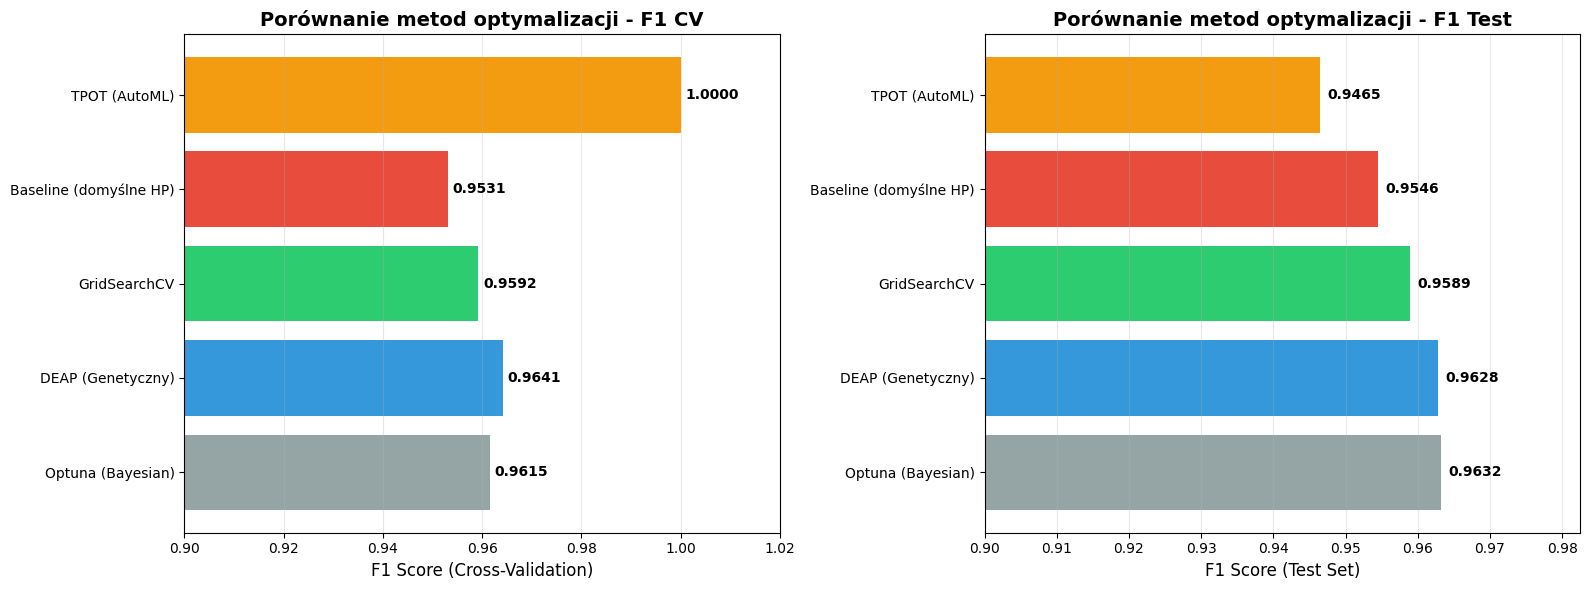

In [36]:
# Wizualizacja 1: Porównanie metod optymalizacji hiperparametrów
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# wykres 1: F1 CV
ax1 = axes[0]
bars1 = ax1.barh(hyperparam_comparison['Metoda'], hyperparam_comparison['F1_CV'], 
                  color=['#95a5a6', '#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
ax1.set_xlabel('F1 Score (Cross-Validation)', fontsize=12)
ax1.set_title('Porównanie metod optymalizacji - F1 CV', fontsize=14, weight='bold')
ax1.set_xlim(0.90, max(hyperparam_comparison['F1_CV']) * 1.02)
ax1.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars1, hyperparam_comparison['F1_CV'])):
    ax1.text(val + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=10, weight='bold')

# wykres 2: F1 test
ax2 = axes[1]
bars2 = ax2.barh(hyperparam_comparison['Metoda'], hyperparam_comparison['F1_test'], 
                  color=['#95a5a6', '#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
ax2.set_xlabel('F1 Score (Test Set)', fontsize=12)
ax2.set_title('Porównanie metod optymalizacji - F1 Test', fontsize=14, weight='bold')
ax2.set_xlim(0.90, max(hyperparam_comparison['F1_test']) * 1.02)
ax2.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars2, hyperparam_comparison['F1_test'])):
    ax2.text(val + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

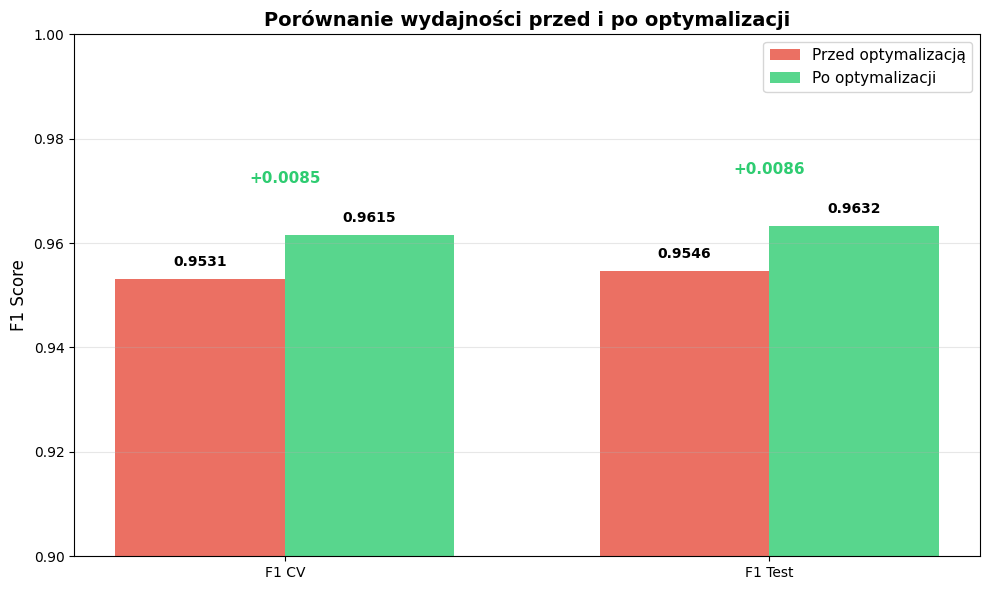

In [35]:
# Wizualizacja 2: Zyski przed vs po optymalizacji
fig, ax = plt.subplots(figsize=(10, 6))

x_labels = ['F1 CV', 'F1 Test']
before = [baseline_df.iloc[0]['F1_CV_mean'], baseline_test_f1]
after = [best_tuning_cv, best_tuning_test]

x = np.arange(len(x_labels))
width = 0.35

bars1 = ax.bar(x - width/2, before, width, label='Przed optymalizacją', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, after, width, label='Po optymalizacji', color='#2ecc71', alpha=0.8)

ax.set_ylabel('F1 Score', fontsize=12)
ax.set_title('Porównanie wydajności przed i po optymalizacji', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=11)
ax.set_ylim(0.90, 1.0)
ax.grid(axis='y', alpha=0.3)

# dodanie wartości na słupkach
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, weight='bold')

# strzałki pokazujące zmianę
for i, (b, a) in enumerate(zip(before, after)):
    change = a - b
    color = '#2ecc71' if change > 0 else '#e74c3c'
    ax.annotate(f'{change:+.4f}', 
                xy=(i, max(b, a) + 0.01), 
                ha='center', fontsize=11, weight='bold', color=color)

plt.tight_layout()
plt.show()

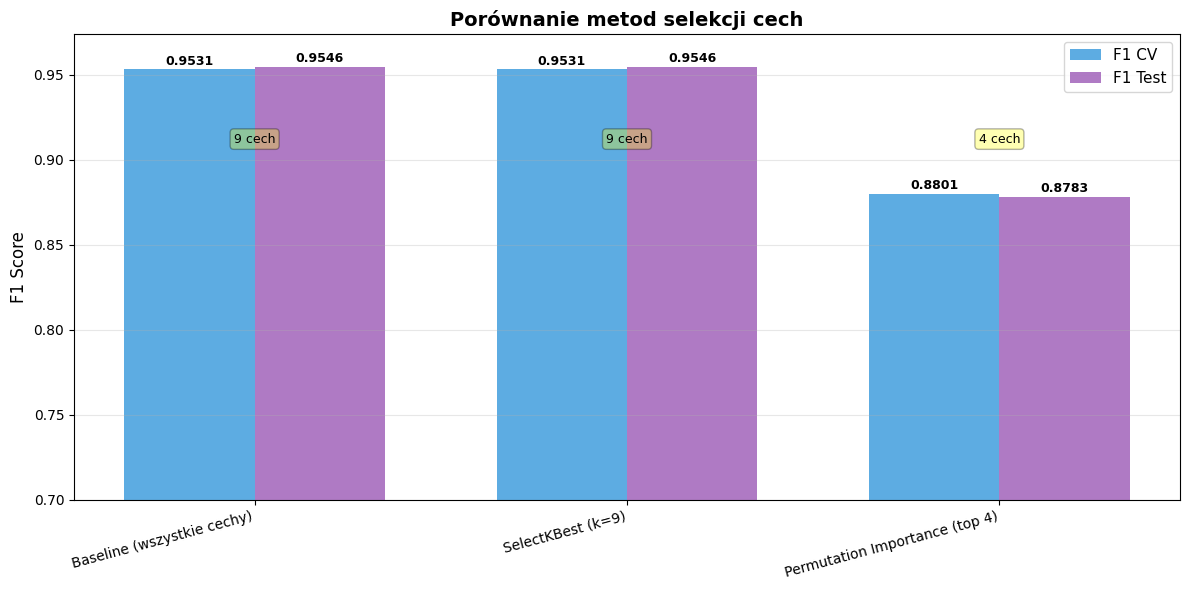

In [34]:
# Wizualizacja 3: Porównanie metod selekcji cech
fig, ax = plt.subplots(figsize=(12, 6))

methods = feat_comparison['Metoda'].tolist()
f1_cv_scores = feat_comparison['F1_CV'].tolist()
f1_test_scores = feat_comparison['F1_test'].tolist()
num_features = feat_comparison['Liczba_cech'].tolist()

x = np.arange(len(methods))
width = 0.35

bars1 = ax.bar(x - width/2, f1_cv_scores, width, label='F1 CV', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, f1_test_scores, width, label='F1 Test', color='#9b59b6', alpha=0.8)

ax.set_ylabel('F1 Score', fontsize=12)
ax.set_title('Porównanie metod selekcji cech', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.set_ylim(0.70, max(max(f1_cv_scores), max(f1_test_scores)) * 1.02)
ax.grid(axis='y', alpha=0.3)

# wartości na słupkach
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9, weight='bold')

# liczba cech jako adnotacja
for i, num in enumerate(num_features):
    ax.text(i, 0.91, f'{num} cech', ha='center', fontsize=9, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()